In [1]:
import cv2
import numpy as np
from keras.optimizers import SGD
import keras.backend as K
from densenet_161 import *

import sys
import os 

os.environ['CUDA_VISIBLE_DEVICES']='1'
sys.setrecursionlimit(3000)

Using TensorFlow backend.


In [2]:

# Use pre-trained weights for Tensorflow backend
weights_path = '/tf/imaterialist-product-2019/models/densenet161_weights_tf.h5'
# Test pretrained model
model = DenseNet(reduction=0.5, classes=1000, weights_path=weights_path)




Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_zeropadding (ZeroPadding2 (None, 230, 230, 3)  0           data[0][0]                       
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 96) 14112       conv1_zeropadding[0][0]          
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 96) 384         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_scal

__________________________________________________________________________________________________
conv5_14_x2 (Conv2D)            (None, 7, 7, 48)     82944       conv5_14_x2_zeropadding[0][0]    
__________________________________________________________________________________________________
concatenate_68 (Concatenate)    (None, 7, 7, 1728)   0           concatenate_67[0][0]             
                                                                 conv5_14_x2[0][0]                
__________________________________________________________________________________________________
conv5_15_x1_bn (BatchNormalizat (None, 7, 7, 1728)   6912        concatenate_68[0][0]             
__________________________________________________________________________________________________
conv5_15_x1_scale (Scale)       (None, 7, 7, 1728)   3456        conv5_15_x1_bn[0][0]             
__________________________________________________________________________________________________
relu5_15_x

cd862406ebfa51ab97c733042fa1d628.jpg


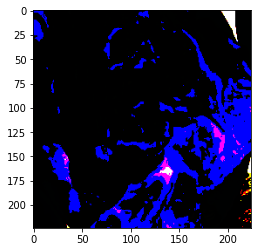

904
e1d567137212335a9a80927d9bccb245.jpg


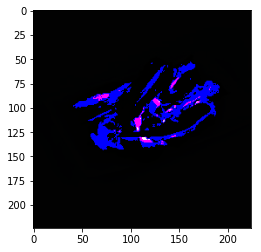

904
9e80433c77a71822e328b679a8a16436.jpg


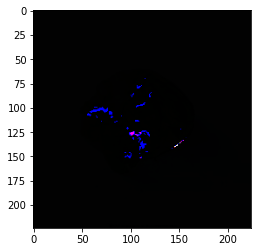

320
0027a1d788024b7e472a99aa3c453d21.jpg


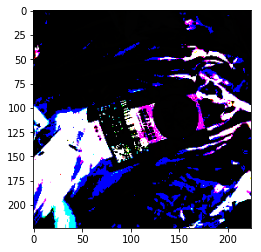

626
7430ffdcbf57d2b403d08a146aa3cfb0.jpg


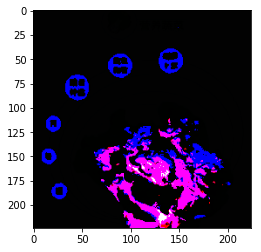

904


[904, 904, 320, 626, 904]

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from ImageGenerator import ImageGenerator
Image_Generator = ImageGenerator()
class_id = 1
file_type = 'val'
images, ids = Image_Generator.get_images_by_class(class_id=class_id, ds=file_type, width=224 ,height=224,densenet=1)

predicts = model.predict(images)
for i in range(len(ids)):
    print(ids[i])
    plt.imshow(images[i])
    plt.show()
    print(predicts[i].argmax())
    
[i.argmax() for i in predicts]

In [10]:
def getDescByClassId(imageNet_Class_Id):
    array = []
    classes = []
    with open('/tf/Alan/classes.txt','r') as list_:
        i = 0
        for line in list_:
            classes.append(line.rstrip('\n'))
            array.append((str(i),str(classes[i])));
            i = i + 1
    return array[imageNet_Class_Id][1]        

# desc = getDescByClassId(409)
# print(desc)

def predict_one_class(class_id,file_type):
    images, ids = Image_Generator.get_images_by_class(class_id=class_id, ds=file_type, width=224 ,height=224,densenet=1)
    imageID_ImageNetID_Desc = {}
    predicts = model.predict(images)
    for i in range(len(ids)):
        #print(ids[i])
        #plt.imshow(images[i])
        #plt.show()
        #print(predicts[i].argmax())
        desc = getDescByClassId(predicts[i].argmax())
        imageID_ImageNetID_Desc[ids[i]] = []
        imageID_ImageNetID_Desc[ids[i]].append(str(predicts[i].argmax()))
        imageID_ImageNetID_Desc[ids[i]].append(desc)
       # imageID_ImageNetID_Desc[ids[i]][str(predicts[i].argmax())] = desc
        #print("class_id: " + str(class_id), "img_id: "+ ids[i], "predict: "+ str(predicts[i].argmax()) , "desc: "+ desc)
        #print([i.argmax() for i in predicts])
    return imageID_ImageNetID_Desc

In [9]:
import json
file_type = 'val'
result = {}
for class_id in range(2019):
    print(class_id)
    imageID_ImageNetID_Desc = predict_one_class(class_id,file_type)
    result[class_id] = {}
    result[class_id] = imageID_ImageNetID_Desc
print(result)
filepath='/tf/Voga/'
filename = '%s_densenet161.json' % file_type
with open(filepath+filename, "w") as f:
    json.dump(result, f)

0
class_id: 0 img_id: 5a225953a4e06097a6d2e389f13afac2.jpg predict: 293 desc: n02130308 cheetah, chetah, Acinonyx jubatus
[293, 782, 904, 916, 910]
class_id: 0 img_id: 2f1ecc4d142b7243221d83bc5d0e78a5.jpg predict: 782 desc: n04152593 screen, CRT screen
[293, 782, 904, 916, 910]
class_id: 0 img_id: 33a2293beeac4419706d4dd06179ab0e.jpg predict: 904 desc: n04589890 window screen
[293, 782, 904, 916, 910]
class_id: 0 img_id: 693d2019b92228cdd244dbba5bcc677a.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[293, 782, 904, 916, 910]
class_id: 0 img_id: 74b8293614d8d51d3b7262a1830c127c.jpg predict: 910 desc: n04597913 wooden spoon
[293, 782, 904, 916, 910]
1
class_id: 1 img_id: cd862406ebfa51ab97c733042fa1d628.jpg predict: 904 desc: n04589890 window screen
[904, 904, 320, 626, 904]
class_id: 1 img_id: e1d567137212335a9a80927d9bccb245.jpg predict: 904 desc: n04589890 window screen
[904, 904, 320, 626, 904]
class_id: 1 img_id: 9e80433c77a71822e328b679a8a16436.jpg predict:

class_id: 14 img_id: 81f69fa59eca62785732317847d327c3.png predict: 916 desc: n06359193 web site, website, internet site, site
[916, 761, 916, 916, 916]
class_id: 14 img_id: ec0dfda8096a9e4cc9b67173ec6213a2.png predict: 761 desc: n04074963 remote control, remote
[916, 761, 916, 916, 916]
class_id: 14 img_id: e314f43b2fbe0157426f357b46f60c7a.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 761, 916, 916, 916]
class_id: 14 img_id: eaeed9bca3bb14240909fa87d6560970.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 761, 916, 916, 916]
class_id: 14 img_id: e82a42b61d0734f155d45b298cbc3387.png predict: 916 desc: n06359193 web site, website, internet site, site
[916, 761, 916, 916, 916]
15
class_id: 15 img_id: 31a633143189d98c15a5b81d453ff2d9.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 626, 779, 904]
class_id: 15 img_id: 138fb9393771fca8579b83ef4f5103b5.jpg predict: 916 desc: n06359193 web site, website, i

class_id: 29 img_id: f551f55e351cc9ccd3bd61f2efce1cfb.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 626, 779]
class_id: 29 img_id: 771d53ea57a8678805e7ad8105c5be30.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 626, 779]
class_id: 29 img_id: eeee574c2ede8482a9e988a6e8529773.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 626, 779]
class_id: 29 img_id: a1f2c4cc46f4e49c2b8521a9142b3c82.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 93, 93, 626, 779]
class_id: 29 img_id: 8259617cc9de7ae44b2031e015140896.jpg predict: 779 desc: n04146614 school bus
[93, 93, 93, 626, 779]
30
class_id: 30 img_id: 0607138fc46ccf5f4d3dcca821153086.jpg predict: 7 desc: n01514668 cock
[7, 916, 93, 487, 916]
class_id: 30 img_id: ca48f89ab4ee4f4d3b5f71f56c9050c0.png predict: 916 desc: n06359193 web site, website, internet site, site
[7, 916, 93, 487, 916]
class_id: 30 img_id: 3d6013bd687b24c75705f1e512ebd979.jpg predict: 93 desc: n01829413 hornbill
[7, 916, 93, 487, 916]

class_id: 44 img_id: 5d7dc9050f8fa7c3df11dab4950a62c1.jpg predict: 530 desc: n03196217 digital clock
[530, 626, 530, 916, 530]
class_id: 44 img_id: af7102da2e0c1a228ae8138828197a30.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 626, 530, 916, 530]
class_id: 44 img_id: 4a95c01ef1f79116c204ac7a04660254.jpg predict: 530 desc: n03196217 digital clock
[530, 626, 530, 916, 530]
class_id: 44 img_id: e80244076bdd7133b929d6dc568cdb67.png predict: 916 desc: n06359193 web site, website, internet site, site
[530, 626, 530, 916, 530]
class_id: 44 img_id: db02c1041e99af1f60d9494d09042b0c.jpg predict: 530 desc: n03196217 digital clock
[530, 626, 530, 916, 530]
45
class_id: 45 img_id: 7d4cdeaf41962fe73a759f972e859bfb.png predict: 761 desc: n04074963 remote control, remote
[761, 761, 828, 626, 530]
class_id: 45 img_id: 60abc8ac3c024fee877203bbb17edaab.jpg predict: 761 desc: n04074963 remote control, remote
[761, 761, 828, 626, 530]
class_id: 45 img_id: ee8217ccb3c661d816f187af9

class_id: 56 img_id: fe8317043da814870d9992cbdfb0164b.jpg predict: 904 desc: n04589890 window screen
[904, 779, 626, 904, 530]
class_id: 56 img_id: b4c68d09d4407ad49d9f2bf7929bf86d.jpg predict: 779 desc: n04146614 school bus
[904, 779, 626, 904, 530]
class_id: 56 img_id: 44c635c692bfc9225ea7279a6ab25faf.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[904, 779, 626, 904, 530]
class_id: 56 img_id: f54ed06f5d7b1cf5033d53924b5f1520.jpg predict: 904 desc: n04589890 window screen
[904, 779, 626, 904, 530]
class_id: 56 img_id: c70dcd35c684a092f919a00881039b06.jpg predict: 530 desc: n03196217 digital clock
[904, 779, 626, 904, 530]
57
class_id: 57 img_id: 299a4c2489bddd535b4443b6bece8f83.jpg predict: 530 desc: n03196217 digital clock
[530, 556, 626, 916, 904]
class_id: 57 img_id: aebc14f4394a852769ac67d66f4158be.jpg predict: 556 desc: n03347037 fire screen, fireguard
[530, 556, 626, 916, 904]
class_id: 57 img_id: 6a250062484e0e3f4ec66a22c88b1d25.jpg predict: 626 desc: n03666

class_id: 68 img_id: d9c3a6b9d07fc03ac82eeadba602f3ca.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 779, 916, 369]
class_id: 68 img_id: 48faff5544dba4050aac17a1a5ca338a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 779, 916, 369]
class_id: 68 img_id: 3df3d471cf1b5d8e599b81cb5d5ea9c2.jpg predict: 779 desc: n04146614 school bus
[626, 626, 779, 916, 369]
class_id: 68 img_id: 7ba5e0c9b03e5c9f1d49da26d9b4e2a1.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 626, 779, 916, 369]
class_id: 68 img_id: ad66972a3fe37211d7ee8c30bab3553b.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 626, 779, 916, 369]
69
class_id: 69 img_id: b98e10734b6ec094087acf274f65c3bd.png predict: 530 desc: n03196217 digital clock
[530, 530, 626, 530, 626]
class_id: 69 img_id: 971fc463d1d170904048e193a9d4296c.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 626, 530, 626]
class

class_id: 80 img_id: 6263e0f4975702322a56c5856659b7c0.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 93, 916, 904]
class_id: 80 img_id: 471c1498cb57eda8841d5b8f92d8dcbb.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 93, 916, 904]
class_id: 80 img_id: 692d682d85d2a1f29fd34264b8629ec3.png predict: 93 desc: n01829413 hornbill
[626, 530, 93, 916, 904]
class_id: 80 img_id: 84c7572fc60f370409fcfc0d178b1052.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 530, 93, 916, 904]
class_id: 80 img_id: 46a6c1b2aaa1ade7e7e572c2eed2f014.jpg predict: 904 desc: n04589890 window screen
[626, 530, 93, 916, 904]
81
class_id: 81 img_id: 3a8906f86f5601b56e0611d1d6faf1b2.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 916, 530, 626]
class_id: 81 img_id: 021d335fdcc083bcf3f08fd63dd61456.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 916, 530, 626]
class_id: 81 img_id: 34981450a36bb70522f72b10b3e70aa1.jp

class_id: 95 img_id: 63ee1a0f2c6debb63a2903c255ed6364.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 369, 556, 761, 7]
class_id: 95 img_id: c23e8b4387be410c8912b863d8252d54.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 369, 556, 761, 7]
class_id: 95 img_id: eeaa5085e6a0c6bd0918a2f5e95b8b22.jpg predict: 556 desc: n03347037 fire screen, fireguard
[626, 369, 556, 761, 7]
class_id: 95 img_id: d7d4643551e7a0c54a0c760d7b3c511b.jpg predict: 761 desc: n04074963 remote control, remote
[626, 369, 556, 761, 7]
class_id: 95 img_id: 07950f5090e202d26601f23dbdaf181f.jpg predict: 7 desc: n01514668 cock
[626, 369, 556, 761, 7]
96
class_id: 96 img_id: 24aca705f112320a35c5de9ea0dc920d.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 904, 761, 626, 916]
class_id: 96 img_id: 46c90211f153f327e4ad99cdb69b9529.jpg predict: 904 desc: n04589890 window screen
[626, 904, 761, 626, 916]
class_id: 96 img_id: 2046f1699

class_id: 107 img_id: 5da5fd87ee7bc25043fbfbc50ff4b7d9.jpg predict: 754 desc: n04041544 radio, wireless
[754, 626, 904, 626, 626]
class_id: 107 img_id: 0d124d6a8fcbf0353b9ab6d52392e089.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[754, 626, 904, 626, 626]
class_id: 107 img_id: 065813cdaabe5c4a7c38a0a3b8dab898.jpg predict: 904 desc: n04589890 window screen
[754, 626, 904, 626, 626]
class_id: 107 img_id: 72ff8cc4d4565e4a45fc47da7e367741.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[754, 626, 904, 626, 626]
class_id: 107 img_id: dcd8007a057a12937dea93756d20cd73.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[754, 626, 904, 626, 626]
108
class_id: 108 img_id: 92e03e5641de98b95c7c744b00ed1c21.jpg predict: 904 desc: n04589890 window screen
[904, 626, 828, 904, 487]
class_id: 108 img_id: 23dca8dfd63f4aebfa33a867ee354c59.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[904, 626, 828, 904, 487]
class_id: 108 img_id: 

class_id: 119 img_id: 5530940268d6cc29212f687ed7bfcda5.jpg predict: 644 desc: n03729826 matchstick
[644, 904, 369, 916, 626]
class_id: 119 img_id: dddbd425bd76b14d6b558f7344ca6d7b.jpg predict: 904 desc: n04589890 window screen
[644, 904, 369, 916, 626]
class_id: 119 img_id: 79ef74ccc246b60365f82635f71832f9.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[644, 904, 369, 916, 626]
class_id: 119 img_id: 10a410c8b578152cb987bed7832df47e.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[644, 904, 369, 916, 626]
class_id: 119 img_id: 6d81fdd247099069680bf4e56599700d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[644, 904, 369, 916, 626]
120
class_id: 120 img_id: deb7025e9b641281363139d186af1d2e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 626, 626, 904]
class_id: 120 img_id: 119db5e95572ca7da1a61ac4f35535c0.jpg predict: 916 desc: n06359193 web site, website, internet site, sit

class_id: 131 img_id: 7f1c74a7e92aa3a3520375019026ab81.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[371, 626, 916, 754, 93]
class_id: 131 img_id: b8f93fbbe0f71141b28e4e8fb4d13147.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[371, 626, 916, 754, 93]
class_id: 131 img_id: 3face65d2caa7d8bf990ad0f517b9897.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[371, 626, 916, 754, 93]
class_id: 131 img_id: c968adcd6bdf05ed7f2852476658cd24.jpg predict: 754 desc: n04041544 radio, wireless
[371, 626, 916, 754, 93]
class_id: 131 img_id: 9c086a10b405d383faeacc4e24513383.jpg predict: 93 desc: n01829413 hornbill
[371, 626, 916, 754, 93]
132
class_id: 132 img_id: e5c347ff9d73f34873e9bc4ec36a4f95.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 93, 18, 18]
class_id: 132 img_id: 60dc46e1e4f2572aff58fe1cdf7ccdb4.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 93, 18, 18]
class_id: 132 img_id: 0d2f4306a9e49c2d54e42b

class_id: 143 img_id: 39fde8c183155ea95a58a481f6fa02cd.jpg predict: 904 desc: n04589890 window screen
[904, 530, 369, 761, 916]
class_id: 143 img_id: 89853184ef86e55e279ca57eb6dc5a26.jpg predict: 530 desc: n03196217 digital clock
[904, 530, 369, 761, 916]
class_id: 143 img_id: d4717ef951d8c2efa42ca4c9e7198ec9.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[904, 530, 369, 761, 916]
class_id: 143 img_id: 7dac0884b180a385537cd3bb56f8bad5.jpg predict: 761 desc: n04074963 remote control, remote
[904, 530, 369, 761, 916]
class_id: 143 img_id: 5bf44fd46491c6ec89a0cad2b489c257.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[904, 530, 369, 761, 916]
144
class_id: 144 img_id: 3ae7298e8931ba78aac764a458851258.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 371, 916, 916, 530]
class_id: 144 img_id: 86a7b4533117e7618a4b4fdf777300a6.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[62

class_id: 155 img_id: d89afd3c8081a0ab87d092b28f26b5ea.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[384, 371, 626, 916, 916]
class_id: 155 img_id: 551b1b9f30d5a7d4aa38069522151865.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[384, 371, 626, 916, 916]
class_id: 155 img_id: 1161477593acb9560da098fbf652ced6.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[384, 371, 626, 916, 916]
class_id: 155 img_id: 2c6aa4654c414ce9d2787db798c18f75.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[384, 371, 626, 916, 916]
class_id: 155 img_id: 8a6df2635f76e45a5ea3506cf804975b.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[384, 371, 626, 916, 916]
156
class_id: 156 img_id: 52639e50883b82f545f9895b5130b22d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 916, 93, 626]
class_id: 156 img_id: 6e6a81d7664145db94b19ce7e4c0727b.jpg predict: 626 desc: n0

class_id: 167 img_id: b821d07fdda64daf223ff82b0e471823.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 761, 487, 311]
class_id: 167 img_id: cb51260ae26374f43140e4347f9f2c41.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 761, 487, 311]
class_id: 167 img_id: a08fd09963597765fac59df14351f942.jpg predict: 761 desc: n04074963 remote control, remote
[626, 626, 761, 487, 311]
class_id: 167 img_id: 5eaf86dd049416218ef408005ab623f9.jpg predict: 487 desc: n02992529 cellular telephone, cellular phone, cellphone, cell, mobile phone
[626, 626, 761, 487, 311]
class_id: 167 img_id: 62027a97e84946a56f901f43aee50bb5.jpg predict: 311 desc: n02226429 grasshopper, hopper
[626, 626, 761, 487, 311]
168
class_id: 168 img_id: 3d76a0f37cbf5abb8bdb63899fa58067.jpg predict: 530 desc: n03196217 digital clock
[530, 904, 626, 487, 904]
class_id: 168 img_id: b09b144a107e1133733a85c0f0c438a6.jpg predict: 904 desc: n04589890 window screen
[530, 904, 626, 487, 

class_id: 179 img_id: 60ea7218ef1bd48ded65302111961ca1.png predict: 93 desc: n01829413 hornbill
[93, 371, 84, 761, 626]
class_id: 179 img_id: f327be844d1670ee22b26cf36d8a2c60.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[93, 371, 84, 761, 626]
class_id: 179 img_id: 0991d6d3b771af72d52168c361525f51.jpg predict: 84 desc: n01806143 peacock
[93, 371, 84, 761, 626]
class_id: 179 img_id: 1bd49d1f3abd70582aa1336e6fdb60d5.jpg predict: 761 desc: n04074963 remote control, remote
[93, 371, 84, 761, 626]
class_id: 179 img_id: 33b48a3acba667eb3b1494605f53d085.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 371, 84, 761, 626]
180
class_id: 180 img_id: 2e1b09f83b89dbe0e692827b167a8ea8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 384, 626, 53, 916]
class_id: 180 img_id: 17fdb269edf25d6550eedf51b52956bc.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[626, 384, 626, 53, 916]
class_id: 180 img

class_id: 191 img_id: 87b4eb6f352cd53d31a75f361e811ddd.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 530, 369, 904]
class_id: 191 img_id: 99884b699034ff6e0dde1983f26848bd.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 530, 369, 904]
class_id: 191 img_id: 05fd293eda27674a38a30b19e04c43f1.jpg predict: 530 desc: n03196217 digital clock
[626, 626, 530, 369, 904]
class_id: 191 img_id: 6f8d2110fed3904ab5701236cc9aaab9.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 626, 530, 369, 904]
class_id: 191 img_id: a9aedacda78fbc8aae9de42d28df5ad5.jpg predict: 904 desc: n04589890 window screen
[626, 626, 530, 369, 904]
192
class_id: 192 img_id: 9910db14147fdf66aec7f5601ab515cd.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 53, 904, 904, 626]
class_id: 192 img_id: 9e9bd4e85419d1e9fb02607ecef3b82e.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring sn

class_id: 206 img_id: 5aa75ae5bfbb04cae12dc73134f7f1d7.jpg predict: 96 desc: n01843383 toucan
[96, 626, 916, 761, 93]
class_id: 206 img_id: 92845e56776ccefaa72c9253fd362b47.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[96, 626, 916, 761, 93]
class_id: 206 img_id: 7804a9f52a5f88c9bec275bb1a314184.png predict: 916 desc: n06359193 web site, website, internet site, site
[96, 626, 916, 761, 93]
class_id: 206 img_id: d32e11b76fb039da2a79d9c1ac79ce92.jpg predict: 761 desc: n04074963 remote control, remote
[96, 626, 916, 761, 93]
class_id: 206 img_id: 46f418694852189f84eb00bc0bcd0bf7.jpg predict: 93 desc: n01829413 hornbill
[96, 626, 916, 761, 93]
207
class_id: 207 img_id: 41e75b1507a085f5ec3763c325260de7.jpg predict: 530 desc: n03196217 digital clock
[530, 626, 93, 530, 916]
class_id: 207 img_id: a4840481c91786f1d25f3238ca6bd5ee.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 626, 93, 530, 916]
class_id: 207 img_id: de93965332012c30ca27c8372fa9ca10

class_id: 221 img_id: fc2afc4cc903c7d1204be977614d19d7.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 761, 779, 626, 271]
class_id: 221 img_id: c025becb34d3abde0921d1c115ec6a27.jpg predict: 761 desc: n04074963 remote control, remote
[626, 761, 779, 626, 271]
class_id: 221 img_id: 358cebc17447680d4c25021c5c0bf596.jpg predict: 779 desc: n04146614 school bus
[626, 761, 779, 626, 271]
class_id: 221 img_id: d9d66bcdbc73f82f8e67f68421bee0f8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 761, 779, 626, 271]
class_id: 221 img_id: ff1e081b161fe5251887cba544d615d0.jpg predict: 271 desc: n02114712 red wolf, maned wolf, Canis rufus, Canis niger
[626, 761, 779, 626, 271]
222
class_id: 222 img_id: 29972dfaa738d6e6fda73d0c8cd0e0bd.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[53, 904, 828, 626, 626]
class_id: 222 img_id: c02eabe04b2ca512d3740fb12476ab58.jpg predict: 904 desc: n04589890 window screen
[53, 904, 828, 626,

class_id: 233 img_id: 7f130c252d2332f3ec7ca17ce58de4d8.jpg predict: 93 desc: n01829413 hornbill
[93, 626, 904, 904, 626]
class_id: 233 img_id: cebb4e542280d9844815dfa303f706a6.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 626, 904, 904, 626]
class_id: 233 img_id: a9ec85df29f388888cafd8fb439dd165.jpg predict: 904 desc: n04589890 window screen
[93, 626, 904, 904, 626]
class_id: 233 img_id: fa6fc89918d3a6756d6d0723a3ae18a3.jpg predict: 904 desc: n04589890 window screen
[93, 626, 904, 904, 626]
class_id: 233 img_id: 8f1f7dcc952e35bbeb28cef42e9b47dc.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 626, 904, 904, 626]
234
class_id: 234 img_id: d45361c5578ba0d820bc809cce3d2e7c.jpg predict: 779 desc: n04146614 school bus
[779, 779, 916, 530, 96]
class_id: 234 img_id: 5ec04b378573ec2e596217e59cae253d.jpg predict: 779 desc: n04146614 school bus
[779, 779, 916, 530, 96]
class_id: 234 img_id: b913b759a5eec860b8de9753ce08ab29.jpg predict: 916 desc: n06

class_id: 248 img_id: e46bb58293b702721de6e8e6a345b976.jpg predict: 93 desc: n01829413 hornbill
[93, 371, 96, 904, 904]
class_id: 248 img_id: 1e923870dbd41be4188017455b6cd41e.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[93, 371, 96, 904, 904]
class_id: 248 img_id: f1eae925192ac0be05e331840e36a5a5.jpg predict: 96 desc: n01843383 toucan
[93, 371, 96, 904, 904]
class_id: 248 img_id: 53ae8e4d701c6598ae63bf160e6d4eda.jpg predict: 904 desc: n04589890 window screen
[93, 371, 96, 904, 904]
class_id: 248 img_id: 7b7ca7573d9447212f1686f8f0860562.jpg predict: 904 desc: n04589890 window screen
[93, 371, 96, 904, 904]
249
class_id: 249 img_id: a41f01f8ed32bbf3c34bf305f4b7fd49.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 779, 271, 626, 626]
class_id: 249 img_id: 5251cca4b9e37f568e069e49590d0ac8.jpg predict: 779 desc: n04146614 school bus
[626, 779, 271, 626, 626]
class_id: 249 img_id: 380f99701667131ad4a24b17d2424bf6.jpg predict: 271 desc: n02

class_id: 260 img_id: eec734af8425859e655faa639e8e02b0.jpg predict: 93 desc: n01829413 hornbill
[93, 916, 626, 530, 920]
class_id: 260 img_id: 86b7981275e9c9ba36b3701e67c8a698.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[93, 916, 626, 530, 920]
class_id: 260 img_id: 13fd0694e27ecb243f7d25008810694b.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 916, 626, 530, 920]
class_id: 260 img_id: 029d15295bfad5e27da5b9181e867691.jpg predict: 530 desc: n03196217 digital clock
[93, 916, 626, 530, 920]
class_id: 260 img_id: 887d5c41b592f7778368e2475cddc748.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[93, 916, 626, 530, 920]
261
class_id: 261 img_id: 05ea7942325e2ac77c6b3f82b9859041.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 920, 530, 761, 84]
class_id: 261 img_id: d1e7de86de946bccde8915357d350280.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[626, 920, 530, 761, 

class_id: 272 img_id: 901d779001e395bb4e9caba650f04bab.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 93, 916, 761, 53]
class_id: 272 img_id: 10f588f0e6f9193cd3225c18aad3540c.png predict: 93 desc: n01829413 hornbill
[626, 93, 916, 761, 53]
class_id: 272 img_id: a2d8fbff52760d1dfd1e7d49b7cd458e.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 93, 916, 761, 53]
class_id: 272 img_id: 14229b9cda5bcd75a0d9aa0e481ee27a.png predict: 761 desc: n04074963 remote control, remote
[626, 93, 916, 761, 53]
class_id: 272 img_id: a2a2042d01d885112c99552433e4acdf.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[626, 93, 916, 761, 53]
273
class_id: 273 img_id: 09b249f8d87dd9ceffdc365d5c267878.png predict: 93 desc: n01829413 hornbill
[93, 761, 626, 93, 530]
class_id: 273 img_id: 3071c1b4d1b9b92d2bb878604f7f63a0.jpg predict: 761 desc: n04074963 remote control, remote
[93, 761, 626, 93, 530]
class_id: 273 img_id: a69ac099dd7

class_id: 287 img_id: 081d3d771431908b9dfa1b382e2cea32.jpg predict: 530 desc: n03196217 digital clock
[530, 93, 916, 916, 916]
class_id: 287 img_id: 90e0a7f835ef0fa3febb4403f5cf49e2.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 916, 916, 916]
class_id: 287 img_id: 31fc80b2e50aeaaaa22ce9816b8c6c22.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[530, 93, 916, 916, 916]
class_id: 287 img_id: 9ce77f25bc786b1ce062c3db25bf224e.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[530, 93, 916, 916, 916]
class_id: 287 img_id: d2798e546a9a3a3ab3d3160bbd1dfa28.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[530, 93, 916, 916, 916]
288
class_id: 288 img_id: c9b3cf5fffabd41867c13ef50fd211d8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 369, 530, 369, 93]
class_id: 288 img_id: 3abc5d1227e1d9b47992ea9e1db4fd56.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[

class_id: 299 img_id: 5f3711ad441354203733257fd43a62e1.png predict: 93 desc: n01829413 hornbill
[93, 626, 371, 626, 916]
class_id: 299 img_id: 025fcaa6a0d4c30797a0911994fe9878.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 626, 371, 626, 916]
class_id: 299 img_id: 8906b2b7e002824f3aa483419421d827.png predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[93, 626, 371, 626, 916]
class_id: 299 img_id: e004950979ef8a2629b86570cecf41b5.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 626, 371, 626, 916]
class_id: 299 img_id: 393c37518e20e30638b16e205785b47c.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[93, 626, 371, 626, 916]
300
class_id: 300 img_id: ac8b0939153de7770d0901d6c08142e1.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[384, 916, 369, 369, 916]
class_id: 300 img_id: a1aa30911ff18a9f94f634ecd75614cd.jpg predict: 916 desc: n06359193 web site, website, internet

class_id: 311 img_id: 2fac4625657646ba7d7451ccb0231082.jpg predict: 779 desc: n04146614 school bus
[779, 626, 93, 779, 96]
class_id: 311 img_id: 12e6220cd46955992579fcce7565f068.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 626, 93, 779, 96]
class_id: 311 img_id: b8aaf68f4d21e93f15acff73e1378385.jpg predict: 93 desc: n01829413 hornbill
[779, 626, 93, 779, 96]
class_id: 311 img_id: e6da2d46c3a27b91f4198eadb6ebb378.jpg predict: 779 desc: n04146614 school bus
[779, 626, 93, 779, 96]
class_id: 311 img_id: 42c0f2eabc6280790e492188df54902b.jpg predict: 96 desc: n01843383 toucan
[779, 626, 93, 779, 96]
312
class_id: 312 img_id: ae950e748e8be337cdf4cab6ad82dfa8.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 626, 369, 904]
class_id: 312 img_id: 636215b1fc983775201271a4d8392b4e.jpg predict: 530 desc: n03196217 digital clock
[761, 530, 626, 369, 904]
class_id: 312 img_id: eeed30dbd6836bb15b3d34c0768becb6.jpg predict: 626 desc: n03666591 lighter, light

class_id: 325 img_id: 370d4020834b1b6f573bf2a7819b061f.jpg predict: 370 desc: n02484975 guenon, guenon monkey
[370, 644, 371, 369, 644]
class_id: 325 img_id: 07a9e914affc76a9f13efa1e12731320.jpg predict: 644 desc: n03729826 matchstick
[370, 644, 371, 369, 644]
class_id: 325 img_id: 8a89e95f2855ec10e75d2fe3c6150e14.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[370, 644, 371, 369, 644]
class_id: 325 img_id: e7540e47107c7d834942bc4420f919dc.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[370, 644, 371, 369, 644]
class_id: 325 img_id: b227c2b1c51a6113a2c1e82637027c2d.jpg predict: 644 desc: n03729826 matchstick
[370, 644, 371, 369, 644]
326
class_id: 326 img_id: bf754df2483959b098e2ebd7fc49407e.jpg predict: 478 desc: n02971356 carton
[478, 761, 530, 93, 530]
class_id: 326 img_id: 675532773d1c44305113030186904f73.jpg predict: 761 desc: n04074963 remote control, remote
[478, 761, 530, 93, 530]
class_id: 326 img_id: cdb32f

class_id: 337 img_id: 87ecaf117afdc62d806c5c14b68ab87c.jpg predict: 93 desc: n01829413 hornbill
[93, 530, 779, 93, 779]
class_id: 337 img_id: f4faaf0ef5e6c5cbccf081f57542fe58.jpg predict: 530 desc: n03196217 digital clock
[93, 530, 779, 93, 779]
class_id: 337 img_id: 37edc9dcfd8e2e5d9626b38129a59d08.jpg predict: 779 desc: n04146614 school bus
[93, 530, 779, 93, 779]
class_id: 337 img_id: 13e02871e72dc33043d467372ab0e985.jpg predict: 93 desc: n01829413 hornbill
[93, 530, 779, 93, 779]
class_id: 337 img_id: 96dfa60775f8d8428bf63df7d7981624.jpg predict: 779 desc: n04146614 school bus
[93, 530, 779, 93, 779]
338
class_id: 338 img_id: c6978fc18811a9c6c930253f4b7b10ba.jpg predict: 904 desc: n04589890 window screen
[904, 920, 626, 626, 626]
class_id: 338 img_id: 1f1ba811139cd6d7eab0bc6bc97280db.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[904, 920, 626, 626, 626]
class_id: 338 img_id: 63d1c9b1e67d9728689ae5b4d38bc4fc.jpg predict: 626 desc: n03666591 lighter, ligh

class_id: 349 img_id: 2d881e802af1687b706d61834d8d220f.jpg predict: 761 desc: n04074963 remote control, remote
[761, 369, 84, 626, 626]
class_id: 349 img_id: 5171960359d5061ad12672c5bbb921ab.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[761, 369, 84, 626, 626]
class_id: 349 img_id: e339b6ebc25d37f1516a07e18f501828.jpg predict: 84 desc: n01806143 peacock
[761, 369, 84, 626, 626]
class_id: 349 img_id: 790e59ac5a7a3caad10348bb67cc5942.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 369, 84, 626, 626]
class_id: 349 img_id: c5597a425c7c5b5800c43bc4d96b82d8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 369, 84, 626, 626]
350
class_id: 350 img_id: 1805cd97b129b8d6d78996dc5549081c.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 93, 916, 93, 530]
class_id: 350 img_id: c2547d671d6366c4f2d8b962a25fb9e1.jpg predict: 93 desc: n01829413 hornbill
[369, 93, 916

class_id: 361 img_id: 916bac0d5e6cec75165a16d64489c2ea.jpg predict: 93 desc: n01829413 hornbill
[93, 761, 916, 779, 779]
class_id: 361 img_id: 296bdef6e91299e4007bdaa5506140f0.jpg predict: 761 desc: n04074963 remote control, remote
[93, 761, 916, 779, 779]
class_id: 361 img_id: 770f5247e3c1bd432ab66a473326a86e.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[93, 761, 916, 779, 779]
class_id: 361 img_id: 54535e6f37fd3bae732e0e51d0fbe01a.jpg predict: 779 desc: n04146614 school bus
[93, 761, 916, 779, 779]
class_id: 361 img_id: 7840f4d02feff0c221071b0adfa17c5a.jpg predict: 779 desc: n04146614 school bus
[93, 761, 916, 779, 779]
362
class_id: 362 img_id: c6a92e32cc55e89e2625b2b068d33c16.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 530, 626, 904]
class_id: 362 img_id: c541b3dbd00393344fe1579c79e6ec71.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 530, 626, 904]
class_id: 362 img_id: 43da92f4c1db0f76149b016

class_id: 373 img_id: 794681e2eecd523c9000dcc822f2c96e.jpg predict: 18 desc: n01582220 magpie
[18, 530, 93, 530, 626]
class_id: 373 img_id: e9b7777fe805eab9fdfc4a34689a6d52.jpg predict: 530 desc: n03196217 digital clock
[18, 530, 93, 530, 626]
class_id: 373 img_id: 309206c6b290324d4fe81f64c85b6e6c.jpg predict: 93 desc: n01829413 hornbill
[18, 530, 93, 530, 626]
class_id: 373 img_id: 512e940eb225730449d7392c311da1dc.jpg predict: 530 desc: n03196217 digital clock
[18, 530, 93, 530, 626]
class_id: 373 img_id: 1a9bc54c6c34f9f1d7fbf637b5397965.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[18, 530, 93, 530, 626]
374
class_id: 374 img_id: 4a4a94e1526281121f5871dae3b0b57f.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 626, 530, 93, 371]
class_id: 374 img_id: b6b95601f263a4fede425f9b66f1710f.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[369, 626, 530, 93, 371]
class_id: 374 img_id: 828b3c00c0c03d70983229b

class_id: 387 img_id: 41db85437f08d3f19d1362fc0afa9c25.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[371, 782, 904, 93, 93]
class_id: 387 img_id: 3945d64ff619ded0811ec50d0c5adf18.jpg predict: 782 desc: n04152593 screen, CRT screen
[371, 782, 904, 93, 93]
class_id: 387 img_id: 0e5ff442c6e38b38940af41c6e6fb9cc.jpg predict: 904 desc: n04589890 window screen
[371, 782, 904, 93, 93]
class_id: 387 img_id: a0a14897c8d2587edcb22ba8bede97a9.jpg predict: 93 desc: n01829413 hornbill
[371, 782, 904, 93, 93]
class_id: 387 img_id: e9f0e1531dc3a62e921ac0e8e3e0675d.jpg predict: 93 desc: n01829413 hornbill
[371, 782, 904, 93, 93]
388
class_id: 388 img_id: cecfeb00e1bf46c988d261086e2bbdd5.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 93, 779, 828]
class_id: 388 img_id: 5b03b32d79b85aeb6b22730bef008a4c.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 369, 93, 779, 828]
class_id: 388 img_id: 2864d987ee010b9b04ccaddec65

class_id: 399 img_id: 2ef19b0538e70e5e48326c0924f245f6.jpg predict: 530 desc: n03196217 digital clock
[530, 562, 384, 626, 384]
class_id: 399 img_id: 0f66891ab4846dc14fa936550e9cebff.jpg predict: 562 desc: n03388043 fountain
[530, 562, 384, 626, 384]
class_id: 399 img_id: 18e1e036dc78c56607af4ec65f508415.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[530, 562, 384, 626, 384]
class_id: 399 img_id: 7f3ef7f284d3b39001251a9ef3b98904.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 562, 384, 626, 384]
class_id: 399 img_id: adee3f7fe5e1c1a7780c5de1098974a1.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[530, 562, 384, 626, 384]
400
class_id: 400 img_id: 1514622ccaacdf040dc3b7d6e30631d5.jpg predict: 851 desc: n04404412 television, television system
[851, 93, 916, 920, 916]
class_id: 400 img_id: 26fa3de5c8d4f7aa150c88411f2255e5.jpg predict: 93 desc: n01829413 hornbill
[851, 93, 916, 920, 916]
class_id: 

class_id: 411 img_id: 6ecfddbfb585c0e7c465db3af269b947.jpg predict: 761 desc: n04074963 remote control, remote
[761, 761, 530, 754, 920]
class_id: 411 img_id: 88bd00d22c42af3d6a38d960c30a95e6.jpg predict: 761 desc: n04074963 remote control, remote
[761, 761, 530, 754, 920]
class_id: 411 img_id: 06633123ada312639792007f67abac64.jpg predict: 530 desc: n03196217 digital clock
[761, 761, 530, 754, 920]
class_id: 411 img_id: 3fef21bb7436cd29f3eefd1c7ecc15d7.jpg predict: 754 desc: n04041544 radio, wireless
[761, 761, 530, 754, 920]
class_id: 411 img_id: e82727f840119f8ce8d0c805be8697dc.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[761, 761, 530, 754, 920]
412
class_id: 412 img_id: 5d982f94fd8a2890d4b0e1dbbd6879e4.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 681, 761, 93]
class_id: 412 img_id: a9a7eb4dcb413ea6452134599b51f46b.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 916, 681, 761, 93]
class_id: 4

class_id: 423 img_id: e54f1534cb271ded4bae910ccf4d86f4.jpg predict: 84 desc: n01806143 peacock
[84, 626, 904, 761, 530]
class_id: 423 img_id: 6a9dab2e312cf986b10f5a4e01ab27da.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[84, 626, 904, 761, 530]
class_id: 423 img_id: 2eb45298e96bf08a2ff61a3aa60ccc3c.jpg predict: 904 desc: n04589890 window screen
[84, 626, 904, 761, 530]
class_id: 423 img_id: ff31aa0607b846860727f784b62ab009.jpg predict: 761 desc: n04074963 remote control, remote
[84, 626, 904, 761, 530]
class_id: 423 img_id: 671a1e431de8edf4c7c07859ec1b8acf.jpg predict: 530 desc: n03196217 digital clock
[84, 626, 904, 761, 530]
424
class_id: 424 img_id: 9ac57b084ae9f1f81f90a1f73ca51916.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 904, 371, 18, 93]
class_id: 424 img_id: 0e3b1d5ba3c78fba5352708b8cf31db9.jpg predict: 904 desc: n04589890 window screen
[916, 904, 371, 18, 93]
class_id: 424 img_id: 037dc18e47127d5e3c9cc77d02d30a49.jpg pred

class_id: 435 img_id: e0649c0ff7a7e02323a91889616ad5f2.jpg predict: 600 desc: n03532672 hook, claw
[600, 93, 18, 761, 626]
class_id: 435 img_id: ea27dad6238a499aedd49ede704ecad4.jpg predict: 93 desc: n01829413 hornbill
[600, 93, 18, 761, 626]
class_id: 435 img_id: d397dd30920d5905368f0b12f04eff28.jpg predict: 18 desc: n01582220 magpie
[600, 93, 18, 761, 626]
class_id: 435 img_id: d6ff61e703e810d5adc74e8eabeef2db.jpg predict: 761 desc: n04074963 remote control, remote
[600, 93, 18, 761, 626]
class_id: 435 img_id: 697b88e1f0427912ef8fb4e0441edb3b.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[600, 93, 18, 761, 626]
436
class_id: 436 img_id: b3447aaca80417b9023d9851cc3141fc.jpg predict: 93 desc: n01829413 hornbill
[93, 761, 626, 664, 916]
class_id: 436 img_id: eaa9895c77995b2b5271f1740eb0224c.jpg predict: 761 desc: n04074963 remote control, remote
[93, 761, 626, 664, 916]
class_id: 436 img_id: bcf97111fc907ba39168158d02c7a31b.jpg predict: 626 desc: n03666591 lighter, l

class_id: 447 img_id: d5ba82eca8ec2e24a952155bcc74c472.jpg predict: 530 desc: n03196217 digital clock
[530, 384, 18, 626, 384]
class_id: 447 img_id: 30646183ed77e04df122931150d844a4.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[530, 384, 18, 626, 384]
class_id: 447 img_id: 687f06dd9401f152020c4eb830564ea7.jpg predict: 18 desc: n01582220 magpie
[530, 384, 18, 626, 384]
class_id: 447 img_id: b86a6765a266f03266f6fe8dabdeb23f.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 384, 18, 626, 384]
class_id: 447 img_id: c7c51c4b29fa5078785460691c2e2558.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[530, 384, 18, 626, 384]
448
class_id: 448 img_id: cf1a0b44e08c5f15cbaf989d70707d44.jpg predict: 605 desc: n03584254 iPod
[605, 93, 916, 18, 494]
class_id: 448 img_id: c60ed291e79a7a43d8f890f29c7927e4.jpg predict: 93 desc: n01829413 hornbill
[605, 93, 916, 18, 494]
class_id: 448 img_id: fe4f6b722ad6c88e99080d0

class_id: 459 img_id: ba9fc197cf929d6293bafc1e045c25e9.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 84, 88, 369]
class_id: 459 img_id: 3853d92eb5e68b71eb53106dc79baea4.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 84, 88, 369]
class_id: 459 img_id: 289c7e79ab45b00f8f8ae011fb965a30.jpg predict: 84 desc: n01806143 peacock
[93, 93, 84, 88, 369]
class_id: 459 img_id: 4d0a3fd479fc88ef16cfc1e966c39728.jpg predict: 88 desc: n01818515 macaw
[93, 93, 84, 88, 369]
class_id: 459 img_id: 33e10d46385924278872ba674db276c6.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[93, 93, 84, 88, 369]
460
class_id: 460 img_id: 3b3345c241cc962c98d3ba04f1dd5685.jpg predict: 761 desc: n04074963 remote control, remote
[761, 18, 18, 369, 546]
class_id: 460 img_id: 5d960a6fe46c8552999417d6af38303c.jpg predict: 18 desc: n01582220 magpie
[761, 18, 18, 369, 546]
class_id: 460 img_id: 344948eeb74d07098e80dc45dadb3210.jpg predict: 18 desc: n01582220 magpie
[761, 18, 18, 

class_id: 474 img_id: 615d9047b7f89e4181a236d8e2f7c5f4.jpg predict: 84 desc: n01806143 peacock
[84, 916, 664, 761, 84]
class_id: 474 img_id: e612e824197a9296d0d4f8b63b5244b7.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[84, 916, 664, 761, 84]
class_id: 474 img_id: 7feedfc6362d7d0d991d9e8ed825e1c7.jpg predict: 664 desc: n03782006 monitor
[84, 916, 664, 761, 84]
class_id: 474 img_id: 5003785945a6b1f80b8ef289562c9ef1.jpg predict: 761 desc: n04074963 remote control, remote
[84, 916, 664, 761, 84]
class_id: 474 img_id: 30a15b33f63a7fc8ede8659866b6d724.jpg predict: 84 desc: n01806143 peacock
[84, 916, 664, 761, 84]
475
class_id: 475 img_id: 563458ed54e943ece4b0892173cd14e7.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 828, 904, 93, 782]
class_id: 475 img_id: 4e2b940a9e9aa93aa9340fd4b84db417.jpg predict: 828 desc: n04332243 strainer
[369, 828, 904, 93, 782]
class_id: 475 img_id: a04702669807287fec0fcb970045e605.jpg p

class_id: 489 img_id: 28db400dda19371611bc3b72d76be9a2.jpg predict: 530 desc: n03196217 digital clock
[530, 371, 93, 93, 530]
class_id: 489 img_id: a5d0b7ff99298ce6eddbe7b8031ccdb5.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[530, 371, 93, 93, 530]
class_id: 489 img_id: e01e45c95b29b995996f92f739cbee1d.jpg predict: 93 desc: n01829413 hornbill
[530, 371, 93, 93, 530]
class_id: 489 img_id: 01e7d291239fcf5af6f3cf52b15de198.jpg predict: 93 desc: n01829413 hornbill
[530, 371, 93, 93, 530]
class_id: 489 img_id: d004f64c2cc20a10d454e832583bf04c.jpg predict: 530 desc: n03196217 digital clock
[530, 371, 93, 93, 530]
490
class_id: 490 img_id: 6514046ad4f2094692610adafb4521da.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 626, 530]
class_id: 490 img_id: e64717da3a9f438ec2bc0eb85fbcfd8b.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 626, 530]
class_id: 490 img_id: b2962eeb8f88598d4acd03eaa2b6d9d3.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 626,

class_id: 501 img_id: 5b65cfabe4d49e2d067666cc3be679ec.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 768, 530, 530, 369]
class_id: 501 img_id: 04ea9ca3b4d56091542a7ca4285905b7.jpg predict: 768 desc: n04118538 rugby ball
[626, 768, 530, 530, 369]
class_id: 501 img_id: 3b21a8bae751c6ba6cf4665cb3cbe191.jpg predict: 530 desc: n03196217 digital clock
[626, 768, 530, 530, 369]
class_id: 501 img_id: 76a4b2531d1be8b8c7e27aa6137b4595.jpg predict: 530 desc: n03196217 digital clock
[626, 768, 530, 530, 369]
class_id: 501 img_id: 51d9f25e26ffbeb9201d070abba6bb37.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 768, 530, 530, 369]
502
class_id: 502 img_id: 5b71d04124686ff186a8f0f73ff2d4a2.jpg predict: 904 desc: n04589890 window screen
[904, 384, 93, 369, 18]
class_id: 502 img_id: 71d5f024e4aeba3d129635636ff45b21.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[904, 384, 93, 369, 18]
class_id: 5

class_id: 513 img_id: 25c36d7c8084950467944e3e4b0160f2.jpg predict: 761 desc: n04074963 remote control, remote
[761, 369, 916, 761, 384]
class_id: 513 img_id: ac5ec404e8f76c2ac1e8b863c029eddc.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[761, 369, 916, 761, 384]
class_id: 513 img_id: e207639fdde5a806ad5a83371f235a77.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 369, 916, 761, 384]
class_id: 513 img_id: b7e39bed6c2c552f62523082df178aee.jpg predict: 761 desc: n04074963 remote control, remote
[761, 369, 916, 761, 384]
class_id: 513 img_id: 3f1403b66bbc5a5178e4ef0078068c7b.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[761, 369, 916, 761, 384]
514
class_id: 514 img_id: 552a34d03b05ccae851be54aba951050.jpg predict: 530 desc: n03196217 digital clock
[530, 920, 530, 530, 530]
class_id: 514 img_id: 879cb4cc1ca140e2901a9a995b46a4ab.jpg predict: 920 desc: n06874185 traffic light, traff

class_id: 525 img_id: 22eabbcffe393d58a6ad3433fb28e0b6.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 761, 920, 530]
class_id: 525 img_id: 24274548af29a07f4b98c430bd77b1cd.jpg predict: 530 desc: n03196217 digital clock
[761, 530, 761, 920, 530]
class_id: 525 img_id: 1e233e28aa7b9fb9ee88c1ceca613a1d.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 761, 920, 530]
class_id: 525 img_id: 22777d9428fb42381b1e9f7da0a92020.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[761, 530, 761, 920, 530]
class_id: 525 img_id: 42d033c30894c977647d5a0a00adf59b.jpg predict: 530 desc: n03196217 digital clock
[761, 530, 761, 920, 530]
526
class_id: 526 img_id: 591b94b740f78bf3415a04e8dd86a01b.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[371, 530, 93, 93, 530]
class_id: 526 img_id: 57b1beae2ff98dc4682e3ea4bc16aa2f.jpg predict: 530 desc: n03196217 digital clock
[371, 530, 93, 93, 530]
class_id: 526 img_id: e63129afd7

class_id: 537 img_id: c3d1bce99131a9e51e9ecdfd6d1491bf.jpg predict: 530 desc: n03196217 digital clock
[530, 761, 530, 530, 530]
class_id: 537 img_id: 2257c868c17393b1f16c8ddc1179689c.jpg predict: 761 desc: n04074963 remote control, remote
[530, 761, 530, 530, 530]
class_id: 537 img_id: 8fea55bb330c4fa53f406e3293d4c418.jpg predict: 530 desc: n03196217 digital clock
[530, 761, 530, 530, 530]
class_id: 537 img_id: 05ee49388ee841dc98a5854fe6bc0c6f.jpg predict: 530 desc: n03196217 digital clock
[530, 761, 530, 530, 530]
class_id: 537 img_id: 93541f8524df478f8cec5060df7eb5aa.png predict: 530 desc: n03196217 digital clock
[530, 761, 530, 530, 530]
538
class_id: 538 img_id: dd7f3a5c95744c422a857b7e4db5a515.jpg predict: 530 desc: n03196217 digital clock
[530, 375, 530, 530, 530]
class_id: 538 img_id: 1a72a11380010ad9bd2c06f110fa5ef5.jpg predict: 375 desc: n02488702 colobus, colobus monkey
[530, 375, 530, 530, 530]
class_id: 538 img_id: a633b2b44cc4d7ad68ab25a2d5752ca8.jpg predict: 530 desc: n03

class_id: 552 img_id: 13e938aadf69a18c0b2864f5fc878021.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 761, 530, 530]
class_id: 552 img_id: 560bb6b87dd12b1f5914b5636cf6d3dc.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 761, 530, 530]
class_id: 552 img_id: 9052b3ad6d913b4b2d373a4b170b1f2d.jpg predict: 761 desc: n04074963 remote control, remote
[530, 530, 761, 530, 530]
class_id: 552 img_id: 177ff655b1346856e8326aa01bb971d8.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 761, 530, 530]
class_id: 552 img_id: f8ebe6cd839a715d721eb1171fdc9945.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 761, 530, 530]
553
class_id: 553 img_id: d78130f0c88f6c0e4f0ce8fda995702d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 18, 93, 18]
class_id: 553 img_id: 4e95690f6f8f09c53d37e41757e0ab79.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 916, 18, 93, 18]
class_id: 553 img_id: fa0f3ed507bb9596fce614dc5eb860d

class_id: 567 img_id: 440d99daf804ad472a6c207629e70dc4.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 530, 369, 916, 388]
class_id: 567 img_id: b7475492c7bf0ce4decf5f52b0de90d6.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 369, 916, 388]
class_id: 567 img_id: 95ed9c8d4ca7e9dd94f48cb149757501.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 530, 369, 916, 388]
class_id: 567 img_id: 528c0af5ae64e122c2a06a21c37cfeae.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[369, 530, 369, 916, 388]
class_id: 567 img_id: 7cf62eb18ac1717b6b8505fd1eedfa81.jpg predict: 388 desc: n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
[369, 530, 369, 916, 388]
568
class_id: 568 img_id: 4eb16ca2c0709b6b88610446c9f85da2.jpg predict: 530 desc: n03196217 digital clock
[530, 326, 369, 369, 904]
class_id: 568 img_id: 808a2c7745ee83db81e05ec069952e45.jpg predic

class_id: 579 img_id: 9f73339a54f4928d985797cd060af082.jpg predict: 18 desc: n01582220 magpie
[18, 916, 916, 93, 369]
class_id: 579 img_id: 69258ee61422c5c797b5cbdc4e2d8942.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[18, 916, 916, 93, 369]
class_id: 579 img_id: c53c018d6973ac92be3dafde1524b924.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[18, 916, 916, 93, 369]
class_id: 579 img_id: 3e0dc9bfbb2e5e0be94302cf26c4cdba.jpg predict: 93 desc: n01829413 hornbill
[18, 916, 916, 93, 369]
class_id: 579 img_id: 71c4e9bceb41b56d2357839b8db7a6e5.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[18, 916, 916, 93, 369]
580
class_id: 580 img_id: fbe121a646e0f178c0c5d50c30a3573d.jpg predict: 93 desc: n01829413 hornbill
[93, 530, 399, 84, 530]
class_id: 580 img_id: 469fe9d32bcc43c16356e08dac606121.jpg predict: 530 desc: n03196217 digital clock
[93, 530, 399, 84, 530]
class_id: 580 img_id: 93c1da3ce0ea045c67c

class_id: 591 img_id: 81bb5055dcf300908ea237903d02adf1.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 93, 371, 530, 93]
class_id: 591 img_id: bb59d5cbd5a95213428d6509069bc2d9.jpg predict: 93 desc: n01829413 hornbill
[626, 93, 371, 530, 93]
class_id: 591 img_id: f7974e50d8334fb5f24dae8d5ecad32d.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[626, 93, 371, 530, 93]
class_id: 591 img_id: ab3a17507c2dc15cdb96efe0cb322005.jpg predict: 530 desc: n03196217 digital clock
[626, 93, 371, 530, 93]
class_id: 591 img_id: 94cba08898caedc44ee5b39f85f0caf6.jpg predict: 93 desc: n01829413 hornbill
[626, 93, 371, 530, 93]
592
class_id: 592 img_id: d1c48249ae2984a15d0351248d4e47aa.jpg predict: 861 desc: n04447861 toilet seat
[861, 779, 84, 904, 530]
class_id: 592 img_id: 33fe65355056ac28902190981ba1661d.jpg predict: 779 desc: n04146614 school bus
[861, 779, 84, 904, 530]
class_id: 592 img_id: 03b818bb5bdb6d8d7b755e1b4f8a8eef.jpg predict: 84 desc: n01806

class_id: 606 img_id: c033fc7fece2463c7587e1d45e50bf08.jpg predict: 761 desc: n04074963 remote control, remote
[761, 18, 916, 916, 17]
class_id: 606 img_id: 61f8e8362706b0aee2d2e142c3d398e2.jpg predict: 18 desc: n01582220 magpie
[761, 18, 916, 916, 17]
class_id: 606 img_id: 063f081eb236b19c0a941052ef6e1382.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 18, 916, 916, 17]
class_id: 606 img_id: 79a36b381f0636b18a8b7172ff7dceb0.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 18, 916, 916, 17]
class_id: 606 img_id: 2779542d3b941738f5eda465cf4dcb2a.jpg predict: 17 desc: n01580077 jay
[761, 18, 916, 916, 17]
607
class_id: 607 img_id: 93d5e18fce67a8fdca24245c6463645f.jpg predict: 499 desc: n03041632 cleaver, meat cleaver, chopper
[499, 530, 916, 633, 93]
class_id: 607 img_id: bc0d7e68c5f96f3a65e74fa7a76d6e55.jpg predict: 530 desc: n03196217 digital clock
[499, 530, 916, 633, 93]
class_id: 607 img_id: 8b54895be99479b5fe2e7c76f633f8ba.

class_id: 621 img_id: 6a76534eb197e489f522c6d9e95c0c90.jpg predict: 754 desc: n04041544 radio, wireless
[754, 626, 530, 384, 369]
class_id: 621 img_id: 997b2b91c1792e0d8722a6eb13e5948c.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[754, 626, 530, 384, 369]
class_id: 621 img_id: 0e3c7acf677af435562cf012a2ee2e2c.jpg predict: 530 desc: n03196217 digital clock
[754, 626, 530, 384, 369]
class_id: 621 img_id: b5ac8186c747f4cae843039408d9f36b.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[754, 626, 530, 384, 369]
class_id: 621 img_id: d4bb8d61286c33d4a7d86943ba310db0.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[754, 626, 530, 384, 369]
622
class_id: 622 img_id: a84dcee976a5f84f565801509145f301.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 714, 293, 369]
class_id: 622 img_id: 69a0b5c41ea57b539f7ed92441770cc9.jpg predict: 530 desc: n03196217 digital clock
[626, 530

class_id: 633 img_id: 01b7a1b66488a7935848bab6e7aa0420.jpg predict: 587 desc: n03481172 hammer
[587, 626, 916, 916, 761]
class_id: 633 img_id: 4cdb06710e3729a4afca220f56fe21be.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[587, 626, 916, 916, 761]
class_id: 633 img_id: 6c3c2500914e52bcacf0469f753196a8.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[587, 626, 916, 916, 761]
class_id: 633 img_id: 4fd2f6b226d08d4182064af2d0e5558a.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[587, 626, 916, 916, 761]
class_id: 633 img_id: dc81cc658d8e17a961710ce2fc002c57.jpg predict: 761 desc: n04074963 remote control, remote
[587, 626, 916, 916, 761]
634
class_id: 634 img_id: 922081f6cbd0f04665501f92b4862200.jpg predict: 93 desc: n01829413 hornbill
[93, 18, 93, 371, 916]
class_id: 634 img_id: 1980a81fd4e0bf101996a76b5b571c59.jpg predict: 18 desc: n01582220 magpie
[93, 18, 93, 371, 916]
class_id: 634 img_id: 241651a68d55af6748fb7d1f203

class_id: 648 img_id: bd6daff1661333841899ebecb295a328.jpg predict: 910 desc: n04597913 wooden spoon
[910, 828, 916, 754, 761]
class_id: 648 img_id: 98e889d0268711d7354f7fc1005ba099.jpg predict: 828 desc: n04332243 strainer
[910, 828, 916, 754, 761]
class_id: 648 img_id: aeba3e2a1e5e93f2e713bbf1c6e5caa6.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[910, 828, 916, 754, 761]
class_id: 648 img_id: 21e4a282909babb42f2e48eb6ee9a83a.jpg predict: 754 desc: n04041544 radio, wireless
[910, 828, 916, 754, 761]
class_id: 648 img_id: 78f3eb16cc3716feee9013fa9349f43d.jpg predict: 761 desc: n04074963 remote control, remote
[910, 828, 916, 754, 761]
649
class_id: 649 img_id: b814a91576c4f73262dd71d81fc0679c.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 920, 84, 916]
class_id: 649 img_id: 96019aec181ffd39b57742af5fde9b17.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 920, 84, 916]
class_id: 649 img_id: 1617946d603df98fa209228c89a073b1.jpg predict: 920 

class_id: 663 img_id: 98ddd5cf59f059bd329096138edda0b3.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 530, 782, 369, 904]
class_id: 663 img_id: 93f33d9a54d55ca5db5b2739702a0637.jpg predict: 530 desc: n03196217 digital clock
[782, 530, 782, 369, 904]
class_id: 663 img_id: 98f2bb8e43aa6275f6f849517a27849a.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 530, 782, 369, 904]
class_id: 663 img_id: ab32a2848d04995226a051d658bfa715.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[782, 530, 782, 369, 904]
class_id: 663 img_id: c30a7d336f1e97ade06f1b4cd76b8371.jpg predict: 904 desc: n04589890 window screen
[782, 530, 782, 369, 904]
664
class_id: 664 img_id: 1e49869d135f1af976c1213bad7819a4.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 916, 369, 530]
class_id: 664 img_id: 7b08110688d271ce1bff0ba9496366bf.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 916, 369, 530]
class_id: 664 img_id: e2652b

class_id: 675 img_id: 3dd5ec6ddea36ff8ed458fb07b1b2722.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 611, 761, 626, 384]
class_id: 675 img_id: bc947a30b8f29b8651a6d6e06cd05bb3.jpg predict: 611 desc: n03598930 jigsaw puzzle
[626, 611, 761, 626, 384]
class_id: 675 img_id: 8063cadfce380e670320c66993d055d7.jpg predict: 761 desc: n04074963 remote control, remote
[626, 611, 761, 626, 384]
class_id: 675 img_id: 15d6ff64b1d4c4455475e9ccf4503445.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 611, 761, 626, 384]
class_id: 675 img_id: 8589566e70ed50ad932dc22bb358d364.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[626, 611, 761, 626, 384]
676
class_id: 676 img_id: cec2bb78167cbf1d0294b7160d27edeb.png predict: 916 desc: n06359193 web site, website, internet site, site
[916, 782, 53, 916, 546]
class_id: 676 img_id: a56da0143152f26e4caa6bdb90fa4d1a.jpg predict: 782 desc: n04152593 screen, CRT screen
[916, 782, 53, 9

class_id: 687 img_id: 215c708ae8567ffc570542a8c44c35cd.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 93, 916, 530, 916]
class_id: 687 img_id: 05be7e75eda6f5f07fc3a8606b6c2caa.jpg predict: 93 desc: n01829413 hornbill
[916, 93, 916, 530, 916]
class_id: 687 img_id: 2eb199c4e39576fa1ccabea4915bddad.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 93, 916, 530, 916]
class_id: 687 img_id: d7a7cc18df8407c8cdda7d070cf5fc0a.jpg predict: 530 desc: n03196217 digital clock
[916, 93, 916, 530, 916]
class_id: 687 img_id: 979e112236b9299abac7b7a6efd25df1.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 93, 916, 530, 916]
688
class_id: 688 img_id: 2bd3b0dc0055eb8f342dc657c206e3b7.jpg predict: 530 desc: n03196217 digital clock
[530, 93, 93, 530, 93]
class_id: 688 img_id: 33eca19cc6dfb689d2c307bf61f45499.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 93, 530, 93]
class_id: 688 img_id: 44491a3e40df0a83a5de127f3c

class_id: 699 img_id: d8cb3a6425b24e1d208a89ed456fa86c.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 644, 828, 530, 754]
class_id: 699 img_id: 3d1bbddbb97797af3df0b0bdac1d13b8.jpg predict: 644 desc: n03729826 matchstick
[626, 644, 828, 530, 754]
class_id: 699 img_id: de6e4c27f89498e89acabf70b7199f3a.jpg predict: 828 desc: n04332243 strainer
[626, 644, 828, 530, 754]
class_id: 699 img_id: a72d8be45a70c4e1ee988076cb101114.jpg predict: 530 desc: n03196217 digital clock
[626, 644, 828, 530, 754]
class_id: 699 img_id: 093130e6a6ff4b2cda46d1a1d60d310b.jpg predict: 754 desc: n04041544 radio, wireless
[626, 644, 828, 530, 754]
700
class_id: 700 img_id: c26d7fb0e8354c41bd78e42a9c340f48.jpg predict: 828 desc: n04332243 strainer
[828, 452, 530, 916, 530]
class_id: 700 img_id: 263c0685ae5eeb6762ca79ebf9019818.jpg predict: 452 desc: n02869837 bonnet, poke bonnet
[828, 452, 530, 916, 530]
class_id: 700 img_id: 22de3334373a37719862cf7d677c1fcd.jpg predict: 530 desc: n0319621

class_id: 714 img_id: 15edfb2279c24a0554dca51a3e0e8175.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 626, 369, 754]
class_id: 714 img_id: 0055fedd9513cc0ffcf337c66ffff202.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 626, 369, 754]
class_id: 714 img_id: da9aa2ada0cd3a0db2129c5c15ff4fe8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 530, 626, 369, 754]
class_id: 714 img_id: 150096b7e662c26bae0e65e1bf0e9909.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 530, 626, 369, 754]
class_id: 714 img_id: 46e1c33705b6efaec549c7c06bdf00c7.jpg predict: 754 desc: n04041544 radio, wireless
[530, 530, 626, 369, 754]
715
class_id: 715 img_id: 35bb5ece23d6eaf5345458cde524e644.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 916, 530, 84]
class_id: 715 img_id: 9cc52950b8c5d22799a53a443caeaa3a.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 369, 916, 530,

class_id: 726 img_id: b9623f2ea366a39d8e89392daf671ed6.jpg predict: 530 desc: n03196217 digital clock
[530, 916, 530, 644, 664]
class_id: 726 img_id: aed0f8a3a402c7cbafe5e0681068f357.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[530, 916, 530, 644, 664]
class_id: 726 img_id: 7291d38e7f0efd155f5f768347a0656f.jpg predict: 530 desc: n03196217 digital clock
[530, 916, 530, 644, 664]
class_id: 726 img_id: 66cb52711425601e61b0e36a77dcf1fa.jpg predict: 644 desc: n03729826 matchstick
[530, 916, 530, 644, 664]
class_id: 726 img_id: 7534c161df615a24198fdde6c2b578a8.jpg predict: 664 desc: n03782006 monitor
[530, 916, 530, 644, 664]
727
class_id: 727 img_id: 4935dc09e3a7298f20d28d089391e4b3.jpg predict: 662 desc: n03777754 modem
[662, 916, 530, 18, 761]
class_id: 727 img_id: 9777cfe7de710005754b3674a72b1d95.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[662, 916, 530, 18, 761]
class_id: 727 img_id: 4538769af3bb9d437293b7477ed508ec.jpg predict: 5

class_id: 738 img_id: afacce53d2341f82a55e589d6dc09c10.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[371, 369, 371, 369, 93]
class_id: 738 img_id: 17ba0a17f5ed5f6ab56ff615562c3f30.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[371, 369, 371, 369, 93]
class_id: 738 img_id: 04ce24b3bb891aa10c1ab83c0f4dee28.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[371, 369, 371, 369, 93]
class_id: 738 img_id: 6924ef49fa1eaad515b1e37ffb5c1188.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[371, 369, 371, 369, 93]
class_id: 738 img_id: b93e25f3c0b13d38988f011c9dd1f168.jpg predict: 93 desc: n01829413 hornbill
[371, 369, 371, 369, 93]
739
class_id: 739 img_id: cbf094bfa520a08751c282e81b1ba1da.jpg predict: 530 desc: n03196217 digital clock
[530, 18, 568, 916, 18]
class_id: 739 img_id: 4d3859c9edcd2f7f8bea32aa9c9e4c8b.jpg predict: 18 desc: n01582220 magpie
[530, 1

class_id: 750 img_id: a39754e28b0641e62cf813e259a6aa0b.jpg predict: 96 desc: n01843383 toucan
[96, 904, 369, 916, 530]
class_id: 750 img_id: c5069859fc85433b4ee695c2cf298ddd.jpg predict: 904 desc: n04589890 window screen
[96, 904, 369, 916, 530]
class_id: 750 img_id: e2d474f70c9abeffb966734905666b24.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[96, 904, 369, 916, 530]
class_id: 750 img_id: 8acb18db4d9d9dd1e1438da7e638fec9.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[96, 904, 369, 916, 530]
class_id: 750 img_id: 38d0cc947ea93ad0b80eb734c27058d3.jpg predict: 530 desc: n03196217 digital clock
[96, 904, 369, 916, 530]
751
class_id: 751 img_id: 22f8e8a0c06c6b8fe353d814136e6ae2.jpg predict: 769 desc: n04118776 rule, ruler
[769, 371, 371, 93, 916]
class_id: 751 img_id: 3d210841987fe651540abb40fb10670a.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[769, 371, 371, 93, 916]
class_id: 751 img_id: 

class_id: 762 img_id: f592876f1290f936fa852afcc1f8dfbf.jpg predict: 93 desc: n01829413 hornbill
[93, 904, 53, 904, 530]
class_id: 762 img_id: d374f5132fbeacc7bc8a5dd9db2337ef.jpg predict: 904 desc: n04589890 window screen
[93, 904, 53, 904, 530]
class_id: 762 img_id: 21171d621c516c83fb037b3a7d53cdf2.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[93, 904, 53, 904, 530]
class_id: 762 img_id: ddb1acd20e035bc4b321aa61d6b1a6c1.jpg predict: 904 desc: n04589890 window screen
[93, 904, 53, 904, 530]
class_id: 762 img_id: 913cd24809a9c180e01e3c0d42168f85.jpg predict: 530 desc: n03196217 digital clock
[93, 904, 53, 904, 530]
763
class_id: 763 img_id: a222471a2bb43295d81a19a0f90a84da.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 530, 779, 370, 18]
class_id: 763 img_id: 1a2e3e25ec05ec970ead911bca38af48.png predict: 530 desc: n03196217 digital clock
[916, 530, 779, 370, 18]
class_id: 763 img_id: 54b2b8848e5cd548a0354ae7b47ec34b.jpg pre

class_id: 777 img_id: caaaa7d0d2b273c75bf323e4ecd0005b.jpg predict: 375 desc: n02488702 colobus, colobus monkey
[375, 608, 18, 920, 530]
class_id: 777 img_id: 02394770eb4047912d756064161bf331.png predict: 608 desc: n03594734 jean, blue jean, denim
[375, 608, 18, 920, 530]
class_id: 777 img_id: c81190c5067ce162dd3c2df9ef5755cc.jpg predict: 18 desc: n01582220 magpie
[375, 608, 18, 920, 530]
class_id: 777 img_id: 37fba73b2363393834b3786194dc8804.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[375, 608, 18, 920, 530]
class_id: 777 img_id: 61a4ffcdc67ce2b4023f43a82e3c907d.jpg predict: 530 desc: n03196217 digital clock
[375, 608, 18, 920, 530]
778
class_id: 778 img_id: 9ba06880900f7103554a949b12647915.jpg predict: 971 desc: n09229709 bubble
[971, 635, 93, 530, 93]
class_id: 778 img_id: ff623270e4bf344f48c15cfe481279c5.jpg predict: 635 desc: n03706229 magnetic compass
[971, 635, 93, 530, 93]
class_id: 778 img_id: ae9c15f90fee013f145426b7fb66aa8a.jpg predict: 93 desc

class_id: 792 img_id: 1e2171cb611a30eaa360d3fb783e181a.jpg predict: 93 desc: n01829413 hornbill
[93, 761, 530, 53, 530]
class_id: 792 img_id: b1d3e952b6e09e498ce7be76173d6778.jpg predict: 761 desc: n04074963 remote control, remote
[93, 761, 530, 53, 530]
class_id: 792 img_id: 2c66265ba37d5554a6bd5e5094eabdd4.jpg predict: 530 desc: n03196217 digital clock
[93, 761, 530, 53, 530]
class_id: 792 img_id: 9a45fb9a29b43b11cf225bf4365de3bb.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[93, 761, 530, 53, 530]
class_id: 792 img_id: 4a98202f3d9fb275eecd8df470456fb2.jpg predict: 530 desc: n03196217 digital clock
[93, 761, 530, 53, 530]
793
class_id: 793 img_id: ca7346134b3363123ed526f022e5391b.jpg predict: 754 desc: n04041544 radio, wireless
[754, 904, 530, 904, 530]
class_id: 793 img_id: de57f92994e95bc28bd6a950e940527c.jpg predict: 904 desc: n04589890 window screen
[754, 904, 530, 904, 530]
class_id: 793 img_id: f8ef1241629e52a4064f430774937ca6.jpg predict: 530 de

class_id: 807 img_id: e6134cafa4acce4de8cefb046d724687.jpg predict: 828 desc: n04332243 strainer
[828, 530, 626, 530, 761]
class_id: 807 img_id: a23227aa8b96fc6605b1bafe9d69ca0e.jpg predict: 530 desc: n03196217 digital clock
[828, 530, 626, 530, 761]
class_id: 807 img_id: 54b153ffe44522fba708d1b84a5a3d69.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[828, 530, 626, 530, 761]
class_id: 807 img_id: df41b95ca0238400019c0d1cb1683854.jpg predict: 530 desc: n03196217 digital clock
[828, 530, 626, 530, 761]
class_id: 807 img_id: 910013484a55fce0abf09be42abfc8e7.jpg predict: 761 desc: n04074963 remote control, remote
[828, 530, 626, 530, 761]
808
class_id: 808 img_id: b81ac84c592bff5eba2d3c8c8b69554a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 530, 626, 530]
class_id: 808 img_id: 19804360274e6360fcc9a072c65570d4.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 916, 530, 626, 530]
class_id: 808 img_id: 1823f0cc508

class_id: 819 img_id: 65d9fb93059f207b82fd39723ca32c40.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 7, 828, 626]
class_id: 819 img_id: 0a695c07372eaf95148a5b3088ef3c3e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 7, 828, 626]
class_id: 819 img_id: 6f62adb167d10793fd05065ddf5cce17.jpg predict: 7 desc: n01514668 cock
[626, 626, 7, 828, 626]
class_id: 819 img_id: f95d7ccf61e278b60f788e161614953b.jpg predict: 828 desc: n04332243 strainer
[626, 626, 7, 828, 626]
class_id: 819 img_id: b36106aca17941787901f954fed031f8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 7, 828, 626]
820
class_id: 820 img_id: 3db2890ac9e61767a26430308510ef19.jpg predict: 761 desc: n04074963 remote control, remote
[761, 371, 369, 530, 916]
class_id: 820 img_id: ed912ce8854940a94fb4b969437c4035.png predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[761, 371, 369, 530, 916]
class_id: 820 img_id: c834fd2b002

class_id: 831 img_id: 0de0fa2b05462fbf76fa09110ec6eca2.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 530, 782, 530, 904]
class_id: 831 img_id: dec3277bb518ddbfbbedde82a13ff626.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 782, 530, 904]
class_id: 831 img_id: 7593f5196b34be9dffe79938a3ac1c11.jpg predict: 782 desc: n04152593 screen, CRT screen
[369, 530, 782, 530, 904]
class_id: 831 img_id: 85a5443ea9a7546c2bec2d6ad7faebce.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 782, 530, 904]
class_id: 831 img_id: 9b4a5098a814e6d91403da7d59bb36a5.jpg predict: 904 desc: n04589890 window screen
[369, 530, 782, 530, 904]
832
class_id: 832 img_id: 9fc5cc8f1d2fa2b897688432d2eeda94.jpg predict: 370 desc: n02484975 guenon, guenon monkey
[370, 369, 530, 779, 626]
class_id: 832 img_id: 4a8822e5a68fdc49d00caca3065c7ffa.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[370, 369, 530, 779, 626]
c

class_id: 843 img_id: 9184af84a91189c14d932d26d3123c8d.jpg predict: 904 desc: n04589890 window screen
[904, 904, 916, 916, 84]
class_id: 843 img_id: 0934ae9d6696dd0bace41e223f492a43.jpg predict: 904 desc: n04589890 window screen
[904, 904, 916, 916, 84]
class_id: 843 img_id: 85e5acb421f9399b157d0a7578a43929.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[904, 904, 916, 916, 84]
class_id: 843 img_id: 309ff2f2827b4d69e6e241c8802d5b7e.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[904, 904, 916, 916, 84]
class_id: 843 img_id: 642f387af64165812d831eed18d5b5ed.jpg predict: 84 desc: n01806143 peacock
[904, 904, 916, 916, 84]
844
class_id: 844 img_id: 37ba765d1eea97f8693ba4b882c64a92.png predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[920, 93, 530, 96, 530]
class_id: 844 img_id: 368b0c2e4f1441481b97e7faa9f27e0a.jpg predict: 93 desc: n01829413 hornbill
[920, 93, 530, 96, 530]
class_id: 844 img_id: ce72b09b0f283195850490e

class_id: 858 img_id: 50badc453a2719d010d6e039e3fc3841.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 644, 93, 761, 93]
class_id: 858 img_id: 0bd5b652502b79fc4294eab27da0c65f.jpg predict: 644 desc: n03729826 matchstick
[916, 644, 93, 761, 93]
class_id: 858 img_id: 0839e39a20f86b1b9ddd84a0fba99493.jpg predict: 93 desc: n01829413 hornbill
[916, 644, 93, 761, 93]
class_id: 858 img_id: 19c9b15aaf6e89066a67b0c7fdbe556c.jpg predict: 761 desc: n04074963 remote control, remote
[916, 644, 93, 761, 93]
class_id: 858 img_id: cffe49d39f8c2863d0f6edc863b44bb9.jpg predict: 93 desc: n01829413 hornbill
[916, 644, 93, 761, 93]
859
class_id: 859 img_id: 03538f936b19995d05ee5e8bd3d165ab.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 18, 18, 93, 530]
class_id: 859 img_id: d03f8efa989c0a18957e75212049523d.jpg predict: 18 desc: n01582220 magpie
[626, 18, 18, 93, 530]
class_id: 859 img_id: 8fdeca3abaec502084d0e4fcd9117383.png predict: 18 desc: n01582220

class_id: 873 img_id: a54dcbca36dc959e86028bc760bf2564.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 88, 93, 916, 93]
class_id: 873 img_id: 5591b1ec7aeda51f628a4e5b0c50771b.jpg predict: 88 desc: n01818515 macaw
[916, 88, 93, 916, 93]
class_id: 873 img_id: bfb03ed6ea7bd590a3230f42bfc9d05e.png predict: 93 desc: n01829413 hornbill
[916, 88, 93, 916, 93]
class_id: 873 img_id: c61506591596fa45af9ed04628e9e75c.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 88, 93, 916, 93]
class_id: 873 img_id: 59f6682e6553c050e0f8bf602863e7f1.jpg predict: 93 desc: n01829413 hornbill
[916, 88, 93, 916, 93]
874
class_id: 874 img_id: 57bb172d91c6b0e6a7f5663198277375.jpg predict: 761 desc: n04074963 remote control, remote
[761, 93, 93, 93, 626]
class_id: 874 img_id: 106707aee731092c6b7053f03a3ecdce.jpg predict: 93 desc: n01829413 hornbill
[761, 93, 93, 93, 626]
class_id: 874 img_id: 1383811b81d91047725fcebf563b2032.jpg predict: 93 desc: n01829413 ho

class_id: 888 img_id: 8efb8c78171aab8263661754a2506aa0.jpg predict: 530 desc: n03196217 digital clock
[530, 782, 761, 779, 761]
class_id: 888 img_id: 0705b0a88b5bce25f681ac176b3bb8b5.jpg predict: 782 desc: n04152593 screen, CRT screen
[530, 782, 761, 779, 761]
class_id: 888 img_id: ff1a28e0985339a5b6170f71edb71fd9.jpg predict: 761 desc: n04074963 remote control, remote
[530, 782, 761, 779, 761]
class_id: 888 img_id: f80606dfa92580280742bd030f8a31b2.jpg predict: 779 desc: n04146614 school bus
[530, 782, 761, 779, 761]
class_id: 888 img_id: 0c48541dfb49356e9d187a1d993f2622.png predict: 761 desc: n04074963 remote control, remote
[530, 782, 761, 779, 761]
889
class_id: 889 img_id: 162bde3c40e9e8963ba61089c002ed15.jpg predict: 779 desc: n04146614 school bus
[779, 779, 93, 88, 626]
class_id: 889 img_id: ffeab1dd9739d76d1f4343bc1f62a79a.png predict: 779 desc: n04146614 school bus
[779, 779, 93, 88, 626]
class_id: 889 img_id: 2909cddeea137e2628ed3567caebca3e.jpg predict: 93 desc: n01829413 hor

class_id: 900 img_id: d60af65a0874a9c46e21a5afff5ed74a.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 782, 782, 904]
class_id: 900 img_id: c849641b2c922eaedf075d05eab8d643.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 369, 782, 782, 904]
class_id: 900 img_id: dc8ff6c1d4479e16619f89596fc7c766.jpg predict: 782 desc: n04152593 screen, CRT screen
[530, 369, 782, 782, 904]
class_id: 900 img_id: 356267d8c647b6149f5bb90c519653bf.jpg predict: 782 desc: n04152593 screen, CRT screen
[530, 369, 782, 782, 904]
class_id: 900 img_id: 3009fdc0d5c413332293b280d020ff29.jpg predict: 904 desc: n04589890 window screen
[530, 369, 782, 782, 904]
901
class_id: 901 img_id: d16268560b05fffc8a77fc8e658ab12a.jpg predict: 530 desc: n03196217 digital clock
[530, 93, 761, 369, 782]
class_id: 901 img_id: 38635d3323bf490df1b7cf0cb3d91b32.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 761, 369, 782]
class_id: 901 img_id: c1bfb3622c81caee8d406686888dda8c.

class_id: 912 img_id: 86da961bcec85d95426501a18da83390.jpg predict: 530 desc: n03196217 digital clock
[530, 904, 530, 530, 904]
class_id: 912 img_id: 2adbd672c16447fcbb55d159456ea33c.jpg predict: 904 desc: n04589890 window screen
[530, 904, 530, 530, 904]
class_id: 912 img_id: 8642264dcbb960dcea804b8346c0f5cf.jpg predict: 530 desc: n03196217 digital clock
[530, 904, 530, 530, 904]
class_id: 912 img_id: ccf532f4d9a511439c9e9e4fe7efd523.jpg predict: 530 desc: n03196217 digital clock
[530, 904, 530, 530, 904]
class_id: 912 img_id: bdcf4ca978f1c841e3dbdc5f1a745e2d.jpg predict: 904 desc: n04589890 window screen
[530, 904, 530, 530, 904]
913
class_id: 913 img_id: 2193cfe07d49b503bea38b57b33fdd0b.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 904, 782, 93, 828]
class_id: 913 img_id: f53eb9ca84eef7fd7107e01909c99ad1.jpg predict: 904 desc: n04589890 window screen
[626, 904, 782, 93, 828]
class_id: 913 img_id: 78e43c8fa66fbfc9faa7bcdc911a8791.jpg predict: 782 desc: n0415

class_id: 927 img_id: 7b1dd1fcc3736a10ee71211c5628481a.jpg predict: 93 desc: n01829413 hornbill
[93, 369, 761, 761, 530]
class_id: 927 img_id: e7540482dbf139060d186d1deabb3001.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[93, 369, 761, 761, 530]
class_id: 927 img_id: 267d447ed1a0cad27a84a847983fc1a2.jpg predict: 761 desc: n04074963 remote control, remote
[93, 369, 761, 761, 530]
class_id: 927 img_id: 5c68c564e5cd5ea8adbb74beb7197f6c.png predict: 761 desc: n04074963 remote control, remote
[93, 369, 761, 761, 530]
class_id: 927 img_id: 6e9c65483a8db5cd2b4f45afd0dae7b0.jpg predict: 530 desc: n03196217 digital clock
[93, 369, 761, 761, 530]
928
class_id: 928 img_id: fcdaf74ff866ff11a27acab38683b9fc.png predict: 761 desc: n04074963 remote control, remote
[761, 754, 761, 754, 920]
class_id: 928 img_id: 96cb42c19122db162e55d404b0b12090.jpg predict: 754 desc: n04041544 radio, wireless
[761, 754, 761, 754, 920]
class_id: 928 img_id: 68954b878eed2603e

class_id: 942 img_id: b7042758c082e1da41acf29e977a9e1b.jpg predict: 530 desc: n03196217 digital clock
[530, 93, 93, 626, 93]
class_id: 942 img_id: f2ef26e0310b26ab0669e9aada1f58c5.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 93, 626, 93]
class_id: 942 img_id: e385a30e199d3ff573d98455c8b7a357.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 93, 626, 93]
class_id: 942 img_id: 9d3e1d880bd34d752e5cacce95d5d16b.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 93, 93, 626, 93]
class_id: 942 img_id: 1f60478059687c7344841793861e96a0.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 93, 626, 93]
943
class_id: 943 img_id: 6143ecde6afd4500f912b709873826da.jpg predict: 828 desc: n04332243 strainer
[828, 84, 779, 626, 916]
class_id: 943 img_id: cda26b4c2a3c74518bbf4470634ea751.jpg predict: 84 desc: n01806143 peacock
[828, 84, 779, 626, 916]
class_id: 943 img_id: 2d43185388404f286e562b4df3379f33.jpg predict: 779 desc: n04146614 school bus
[828, 84, 779, 626, 916]
clas

class_id: 957 img_id: b18e07963068b450807ae279f6deb327.png predict: 18 desc: n01582220 magpie
[18, 93, 369, 93, 18]
class_id: 957 img_id: 0479fb63e7024b2e8242b6461c2cc7ee.png predict: 93 desc: n01829413 hornbill
[18, 93, 369, 93, 18]
class_id: 957 img_id: 7dfb4766c9032d6fb6d8e935d9f70401.png predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[18, 93, 369, 93, 18]
class_id: 957 img_id: 9b79e60c2f8ab7a104daddc6398f8b91.jpg predict: 93 desc: n01829413 hornbill
[18, 93, 369, 93, 18]
class_id: 957 img_id: 4c455388e7d1f83c4a8d558c8a736675.jpg predict: 18 desc: n01582220 magpie
[18, 93, 369, 93, 18]
958
class_id: 958 img_id: 3ff943a4aef5acae1c7d227005252d63.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 84, 761, 530]
class_id: 958 img_id: 18d03122c8fb8174e2510b5d8eab1eb6.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 84, 761, 530]
class_id: 958 img_id: 9618b833ca097e47af4af13f56a04ff4.jpg predict: 84 desc: n01806143 peacock
[530, 530, 8

class_id: 969 img_id: b8ef3187c599662052c48024fbaa4839.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 18, 916, 530, 530]
class_id: 969 img_id: 44910b2c104d776725d6add3f92e3366.jpg predict: 18 desc: n01582220 magpie
[782, 18, 916, 530, 530]
class_id: 969 img_id: 60ba01d73b038e79b6062462eead0005.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[782, 18, 916, 530, 530]
class_id: 969 img_id: 32748c16d0da17e8aa08834521f94e92.jpg predict: 530 desc: n03196217 digital clock
[782, 18, 916, 530, 530]
class_id: 969 img_id: 1edfce0c8e5e769e04da3d005244be78.jpg predict: 530 desc: n03196217 digital clock
[782, 18, 916, 530, 530]
970
class_id: 970 img_id: fe30eaa7c250f85b4856de018044d7d3.jpg predict: 93 desc: n01829413 hornbill
[93, 626, 93, 530, 530]
class_id: 970 img_id: 91bdf3aec003887a9667d4c640d0f34f.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 626, 93, 530, 530]
class_id: 970 img_id: 51559b3e942a27fe92fac77715aefbfb.jpg predict: 93 des

class_id: 984 img_id: 09206e93f07de9642f2d85b32a722920.jpg predict: 530 desc: n03196217 digital clock
[530, 828, 761, 17, 93]
class_id: 984 img_id: 318a73acb8d9749fb5436da91380ec4a.jpg predict: 828 desc: n04332243 strainer
[530, 828, 761, 17, 93]
class_id: 984 img_id: 3101c175b6664ad12dc9f14abdcf0ddd.jpg predict: 761 desc: n04074963 remote control, remote
[530, 828, 761, 17, 93]
class_id: 984 img_id: 3f343a01ed132ebb343dd6d82125fd69.jpg predict: 17 desc: n01580077 jay
[530, 828, 761, 17, 93]
class_id: 984 img_id: ba5a8f51e7d2cedf10f2fc56ed0c2cc5.jpg predict: 93 desc: n01829413 hornbill
[530, 828, 761, 17, 93]
985
class_id: 985 img_id: d15a7d340b11ee8f7f30ce6b6c43597a.jpg predict: 93 desc: n01829413 hornbill
[93, 904, 369, 530, 369]
class_id: 985 img_id: 5ab792f16c512570d42ec0ae96090dee.jpg predict: 904 desc: n04589890 window screen
[93, 904, 369, 530, 369]
class_id: 985 img_id: f0194df660fcc56d0cadac15990e9cc2.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangu

class_id: 996 img_id: 56d234b38263f0ad79e3b4c2c7ac1640.jpg predict: 497 desc: n03028079 church, church building
[497, 487, 916, 761, 369]
class_id: 996 img_id: 36fdfd01315f56941f6e5853b7f0bfa1.jpg predict: 487 desc: n02992529 cellular telephone, cellular phone, cellphone, cell, mobile phone
[497, 487, 916, 761, 369]
class_id: 996 img_id: ea340b4c3bb143a76f926c78bbe044c3.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[497, 487, 916, 761, 369]
class_id: 996 img_id: e03252bb820c8b88618fed900b45df5a.jpg predict: 761 desc: n04074963 remote control, remote
[497, 487, 916, 761, 369]
class_id: 996 img_id: 97cd9ed8c4d49993c5d9b37b832ba8a0.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[497, 487, 916, 761, 369]
997
class_id: 997 img_id: 34a5f51fef6db48238d0d136056334f9.jpg predict: 664 desc: n03782006 monitor
[664, 530, 904, 782, 369]
class_id: 997 img_id: c58e5e4baa8e36cadd8c24fa79a3d65d.jpg predict: 530 desc: n03196217 digital

class_id: 1008 img_id: 69bc6fb2ec60d7e1c863979a5548455c.png predict: 761 desc: n04074963 remote control, remote
[761, 84, 93, 18, 530]
class_id: 1008 img_id: 7c368b67ee584df2e8fddaaab1a92ec1.jpg predict: 84 desc: n01806143 peacock
[761, 84, 93, 18, 530]
class_id: 1008 img_id: 14bf965c42c53bdf0f069ba55f5e80a2.jpg predict: 93 desc: n01829413 hornbill
[761, 84, 93, 18, 530]
class_id: 1008 img_id: 095fe1f8d1d50beefed489fa51f15523.jpg predict: 18 desc: n01582220 magpie
[761, 84, 93, 18, 530]
class_id: 1008 img_id: fad17cd3fbb755affd99c111d8866b9c.jpg predict: 530 desc: n03196217 digital clock
[761, 84, 93, 18, 530]
1009
class_id: 1009 img_id: 6a8bf1942114015ee64fff62f4b17ec3.jpg predict: 761 desc: n04074963 remote control, remote
[761, 18, 93, 530, 530]
class_id: 1009 img_id: ab76b60c69d21e9c907b4b14feb3f59c.jpg predict: 18 desc: n01582220 magpie
[761, 18, 93, 530, 530]
class_id: 1009 img_id: 8295e435a68ef408daa7ddfacc8d3be7.jpg predict: 93 desc: n01829413 hornbill
[761, 18, 93, 530, 530]
c

class_id: 1020 img_id: 184a72869fe96836dc6c59deb5bfff6a.jpg predict: 84 desc: n01806143 peacock
[84, 608, 626, 626, 779]
class_id: 1020 img_id: 67a65b4d3df6bfe5837eccaec387fd67.jpg predict: 608 desc: n03594734 jean, blue jean, denim
[84, 608, 626, 626, 779]
class_id: 1020 img_id: 9d4d38318b05089500ca4f2880679cd3.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[84, 608, 626, 626, 779]
class_id: 1020 img_id: 59f1d27eb90eb7523dacbd54211f00f5.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[84, 608, 626, 626, 779]
class_id: 1020 img_id: c35a0879ddd0fff72577f8cc624aeeb5.jpg predict: 779 desc: n04146614 school bus
[84, 608, 626, 626, 779]
1021
class_id: 1021 img_id: c9c6b10866429e6c9c0d82d20f8a4d5d.jpg predict: 93 desc: n01829413 hornbill
[93, 779, 369, 84, 530]
class_id: 1021 img_id: adc45a2efd9070289a69ea30e7156d6c.jpg predict: 779 desc: n04146614 school bus
[93, 779, 369, 84, 530]
class_id: 1021 img_id: 51818a7f7796b7eb7917d61a0fb2cc8e.jpg predict: 369 

class_id: 1032 img_id: 273d813d9b2864cedd3343efed6ab879.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 93, 93, 530, 779]
class_id: 1032 img_id: a9f0540b586cf7bf17762d6bc3bb30ff.png predict: 93 desc: n01829413 hornbill
[626, 93, 93, 530, 779]
class_id: 1032 img_id: 2c6a4e8abe8699b99ef700e606d32df0.jpg predict: 93 desc: n01829413 hornbill
[626, 93, 93, 530, 779]
class_id: 1032 img_id: d24c75c9929ade09e5290c98b8dc2693.jpg predict: 530 desc: n03196217 digital clock
[626, 93, 93, 530, 779]
class_id: 1032 img_id: 984d7e242f3c1d1c169defec197a0694.jpg predict: 779 desc: n04146614 school bus
[626, 93, 93, 530, 779]
1033
class_id: 1033 img_id: 81e9e6c607ef72f1d63c0914275dd702.jpg predict: 93 desc: n01829413 hornbill
[93, 530, 369, 779, 530]
class_id: 1033 img_id: accd555eb10e8e83171e90c69628c023.jpg predict: 530 desc: n03196217 digital clock
[93, 530, 369, 779, 530]
class_id: 1033 img_id: 176c6f939acd01420d61e096d0d8d44e.jpg predict: 369 desc: n02483708 siamang, Hylobate

class_id: 1047 img_id: 72234213a4957d9d0167e6aefb1e7ac7.png predict: 18 desc: n01582220 magpie
[18, 761, 779, 88, 626]
class_id: 1047 img_id: 767723d8c4f41d1bb99ee9853dc1fff9.jpg predict: 761 desc: n04074963 remote control, remote
[18, 761, 779, 88, 626]
class_id: 1047 img_id: 7fb7a9e8309d6cf5e62975a109814125.jpg predict: 779 desc: n04146614 school bus
[18, 761, 779, 88, 626]
class_id: 1047 img_id: 067598ac0e9b2a48b501bd1a0b6afb88.jpg predict: 88 desc: n01818515 macaw
[18, 761, 779, 88, 626]
class_id: 1047 img_id: 4a66f3ceadbbed2f87047fccb7a27432.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[18, 761, 779, 88, 626]
1048
class_id: 1048 img_id: b2368009a885abfbf085959d20432425.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 779, 93, 530, 93]
class_id: 1048 img_id: 1c6e081c0d22c056ea49fd8236fce83e.jpg predict: 779 desc: n04146614 school bus
[626, 779, 93, 530, 93]
class_id: 1048 img_id: 5fcd6799480bb5786ff92abad9d3a0b0.jpg predict: 93 desc: n018

class_id: 1059 img_id: fe541eeb13c43387cdc622005ae53ccb.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 93, 92]
class_id: 1059 img_id: 832e2a360e78295da3ae77f48d70d567.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 93, 92]
class_id: 1059 img_id: 17214c4487608c7a5dd7cd5135b47cbd.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 93, 92]
class_id: 1059 img_id: 23d3e5b51c9e4e33066367c1a3076466.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 93, 92]
class_id: 1059 img_id: ac5fb8ef9e7025f0d70d90a061818e82.jpg predict: 92 desc: n01828970 bee eater
[93, 93, 93, 93, 92]
1060
class_id: 1060 img_id: a100948b4e6e577a06f1c13aacea4430.jpg predict: 530 desc: n03196217 digital clock
[530, 904, 626, 530, 93]
class_id: 1060 img_id: 079ace179aa3ac466e020b35f864755b.jpg predict: 904 desc: n04589890 window screen
[530, 904, 626, 530, 93]
class_id: 1060 img_id: d2faed6c214eb383b7896841a58f4f3a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 904, 626, 530, 93]
c

class_id: 1071 img_id: b70da16e3c3c533b1a2a86e2019f5df6.jpg predict: 93 desc: n01829413 hornbill
[93, 18, 375, 371, 369]
class_id: 1071 img_id: 56dcd3ae29ea627ecb869b61a85cc307.png predict: 18 desc: n01582220 magpie
[93, 18, 375, 371, 369]
class_id: 1071 img_id: 2aaf3874220dc8b0fca7b732bf739bb8.jpg predict: 375 desc: n02488702 colobus, colobus monkey
[93, 18, 375, 371, 369]
class_id: 1071 img_id: 3b03a4fe3e578c2300890a5becaf1f18.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[93, 18, 375, 371, 369]
class_id: 1071 img_id: 44f0193f84a83466430505eabaa0ab2c.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[93, 18, 375, 371, 369]
1072
class_id: 1072 img_id: f78cf231bdb821baf7181a5e1b576e0d.jpg predict: 779 desc: n04146614 school bus
[779, 530, 984, 761, 779]
class_id: 1072 img_id: 0a35e3081b0de003aa830f18da10a2bf.jpg predict: 530 desc: n03196217 digital clock
[779, 530, 984, 761, 779]
class_id: 1072 img_id: c834d9f4b57eff43

class_id: 1083 img_id: 3b0bce9cabe8de6d7a3ad175b5cb95fa.jpg predict: 779 desc: n04146614 school bus
[779, 93, 626, 93, 96]
class_id: 1083 img_id: de1219be4a731218bfb9a538b3ab625f.jpg predict: 93 desc: n01829413 hornbill
[779, 93, 626, 93, 96]
class_id: 1083 img_id: c7db1294c7ecefcc72d61df9844cd33d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 93, 626, 93, 96]
class_id: 1083 img_id: 15a1669bd7d6303d9fbaa86644e28fd9.jpg predict: 93 desc: n01829413 hornbill
[779, 93, 626, 93, 96]
class_id: 1083 img_id: 15b9194f095fc12e6f9b99c3c7b4df37.jpg predict: 96 desc: n01843383 toucan
[779, 93, 626, 93, 96]
1084
class_id: 1084 img_id: 759e33e411f8e44231666f7835e680cf.jpg predict: 84 desc: n01806143 peacock
[84, 18, 920, 84, 371]
class_id: 1084 img_id: ebf9b2a61ffd08ab19a71ef05d1ba8bc.jpg predict: 18 desc: n01582220 magpie
[84, 18, 920, 84, 371]
class_id: 1084 img_id: 8206e169af891dce832e923b5d23c0eb.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[8

class_id: 1098 img_id: 1d48a16ab377ed0f56f4c4761541bc13.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 904, 779, 92]
class_id: 1098 img_id: 57d399293b547cc501b40c355b328ac1.jpg predict: 530 desc: n03196217 digital clock
[761, 530, 904, 779, 92]
class_id: 1098 img_id: 78dddca6da34f0504f7464389f1de6d9.jpg predict: 904 desc: n04589890 window screen
[761, 530, 904, 779, 92]
class_id: 1098 img_id: 1c7e5a88c04ffe7488b6753826e07b8d.jpg predict: 779 desc: n04146614 school bus
[761, 530, 904, 779, 92]
class_id: 1098 img_id: 69a7811adadd03f3d632efacc927c857.jpg predict: 92 desc: n01828970 bee eater
[761, 530, 904, 779, 92]
1099
class_id: 1099 img_id: af5b4979fa4785db9b2b3e1cd06d7e47.jpg predict: 828 desc: n04332243 strainer
[828, 761, 530, 626, 904]
class_id: 1099 img_id: a35571590da4a5d1b705505898949fc5.jpg predict: 761 desc: n04074963 remote control, remote
[828, 761, 530, 626, 904]
class_id: 1099 img_id: fc74c5e66a337303575f5897fc2942e1.jpg predict: 530 desc: n03196217 dig

class_id: 1113 img_id: 70ec437d5285ee51f27275932fe3ded6.jpg predict: 779 desc: n04146614 school bus
[779, 779, 530, 779, 779]
class_id: 1113 img_id: 8c708683189ec79328e870bc698b5f5b.jpg predict: 779 desc: n04146614 school bus
[779, 779, 530, 779, 779]
class_id: 1113 img_id: 97207e69f1ecd25a4d875450597bb14b.jpg predict: 530 desc: n03196217 digital clock
[779, 779, 530, 779, 779]
class_id: 1113 img_id: 51bbd534d1da4141d04df6b7012c1453.jpg predict: 779 desc: n04146614 school bus
[779, 779, 530, 779, 779]
class_id: 1113 img_id: 5c97001382531e0000c4de7b8cc5844a.jpg predict: 779 desc: n04146614 school bus
[779, 779, 530, 779, 779]
1114
class_id: 1114 img_id: e60127d1b5d75e258375dc94bb4fb85b.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 96, 371, 761, 530]
class_id: 1114 img_id: 99304ad3ab40726adc9e15b53091e3b6.png predict: 96 desc: n01843383 toucan
[626, 96, 371, 761, 530]
class_id: 1114 img_id: 7d4716fd58c7badfdcff1e8ad66886a2.jpg predict: 371 desc: n02486261 patas,

class_id: 1125 img_id: fc8a43c539184fa01799669ce382f19a.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 468, 916, 626, 530]
class_id: 1125 img_id: 9e7e47f202275bd05a80dbcc438264d9.jpg predict: 468 desc: n02930766 cab, hack, taxi, taxicab
[782, 468, 916, 626, 530]
class_id: 1125 img_id: 6f59f218da3078759c5be10c6526461c.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[782, 468, 916, 626, 530]
class_id: 1125 img_id: cdc53f60d35a0e28c3c20065c94d5f78.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[782, 468, 916, 626, 530]
class_id: 1125 img_id: 9caf70cca132d74a1eb7faa882e90e94.jpg predict: 530 desc: n03196217 digital clock
[782, 468, 916, 626, 530]
1126
class_id: 1126 img_id: 006ce7df3670978c362a487db0806e6e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 761, 530, 626, 904]
class_id: 1126 img_id: 06b9ceb5a434bee1cba6ceeaffd202c5.jpg predict: 761 desc: n04074963 remote control, remote
[626, 761, 530, 626, 904]
clas

class_id: 1137 img_id: 7993d7e48c1ac70fed3a182e144aa267.jpg predict: 84 desc: n01806143 peacock
[84, 779, 626, 779, 626]
class_id: 1137 img_id: ac07630b409baacfaba7bde4db8917ba.jpg predict: 779 desc: n04146614 school bus
[84, 779, 626, 779, 626]
class_id: 1137 img_id: 08b293537be3cfb9d08ac9164aabaa42.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[84, 779, 626, 779, 626]
class_id: 1137 img_id: ddc406b52bcc46b6643c63f97864afbe.jpg predict: 779 desc: n04146614 school bus
[84, 779, 626, 779, 626]
class_id: 1137 img_id: 76380e0071f377c00b13e6ebedc1d24b.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[84, 779, 626, 779, 626]
1138
class_id: 1138 img_id: d855cddb3bc38f6ce3f5ec5d11d08e46.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 530, 626, 761]
class_id: 1138 img_id: 951f14670f168628901647dec9f4404f.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 530, 626, 761]
class_id: 1138 img_id: c821ffdf348438437075b6861d316f2a.jpg predict: 530 desc: n03196217

class_id: 1152 img_id: 7a7c35baba74165e902a38e6212a5a66.jpg predict: 93 desc: n01829413 hornbill
[93, 626, 93, 984, 371]
class_id: 1152 img_id: d807000e0d9d1a5278dd262d22ceacc6.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 626, 93, 984, 371]
class_id: 1152 img_id: c806bee8ba8be1e1089c79946035d3c5.jpg predict: 93 desc: n01829413 hornbill
[93, 626, 93, 984, 371]
class_id: 1152 img_id: 433453e2d1d73686fa883683215510cf.jpg predict: 984 desc: n11879895 rapeseed
[93, 626, 93, 984, 371]
class_id: 1152 img_id: aecec555781f37e4dbf44d22dc1c2301.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[93, 626, 93, 984, 371]
1153
class_id: 1153 img_id: 27cb3299d5b67b373a7cb93f4c1ce675.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 369, 93, 93, 371]
class_id: 1153 img_id: c97b4f9f0b06133ac5b6132b271d06a1.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 369, 93, 

class_id: 1164 img_id: 16b83d8feb7774a3eec7c62fa036c064.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 371, 626, 916, 93]
class_id: 1164 img_id: 3365334185022d8304c24a8d76ee73f3.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[626, 371, 626, 916, 93]
class_id: 1164 img_id: 24525aed45ab3344b0ea241e3a395e5e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 371, 626, 916, 93]
class_id: 1164 img_id: dd7347dd7a6c3bcae0c8763b1424c4a5.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 371, 626, 916, 93]
class_id: 1164 img_id: b945405f05c6958970d1c327e5f7c400.png predict: 93 desc: n01829413 hornbill
[626, 371, 626, 916, 93]
1165
class_id: 1165 img_id: 72f484a34b4b7446497fa37ce0186301.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 84, 626, 93, 84]
class_id: 1165 img_id: ac013cc3c61b0de26f6e2aa8c7e9c85a.jpg predict: 84 desc: n01806143 peacock
[626, 84, 626, 93, 84]
class_i

class_id: 1176 img_id: dfed6a6d7a19ea73b0e82f7d3afc4657.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 916, 761, 916, 93]
class_id: 1176 img_id: a23a01fe9006c5d20e5997617ab483cb.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[369, 916, 761, 916, 93]
class_id: 1176 img_id: c3425be1087e6802be8bf3b7300aa481.jpg predict: 761 desc: n04074963 remote control, remote
[369, 916, 761, 916, 93]
class_id: 1176 img_id: b99926a696913065718d480add8c5fbb.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[369, 916, 761, 916, 93]
class_id: 1176 img_id: 4fdf8d3e725f113e56ab756bc23aa211.jpg predict: 93 desc: n01829413 hornbill
[369, 916, 761, 916, 93]
1177
class_id: 1177 img_id: 746cd42cc643583698560d7a97fafc24.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 369, 93, 93, 370]
class_id: 1177 img_id: f6add39c001f4ce3c523675dafa6d87d.jpg predict: 369 desc: n02483708 siamang, Hylobates synda

class_id: 1188 img_id: 21dede0f6e3ea924d68eef49125a2941.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 530, 530, 904]
class_id: 1188 img_id: 6aaa8f61c6cdf6f37e350e0690107557.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 530, 530, 904]
class_id: 1188 img_id: 929182e9bf3dabaf842ef9ba0f8f2fb9.png predict: 530 desc: n03196217 digital clock
[626, 626, 530, 530, 904]
class_id: 1188 img_id: c46198c246cf6501a654b70e24b5887c.jpg predict: 530 desc: n03196217 digital clock
[626, 626, 530, 530, 904]
class_id: 1188 img_id: 4a93cfa7cb6f212dd0c4750b7336d4b3.jpg predict: 904 desc: n04589890 window screen
[626, 626, 530, 530, 904]
1189
class_id: 1189 img_id: 5e9ae85dce72baf0c34e17fb338c2535.jpg predict: 761 desc: n04074963 remote control, remote
[761, 916, 84, 626, 530]
class_id: 1189 img_id: af4c92e1c01c7749186f2972f3e947ce.png predict: 916 desc: n06359193 web site, website, internet site, site
[761, 916, 84, 626, 530]
class_id: 1189 img_id:

class_id: 1200 img_id: 4ed936c4b3355493ba4840e622c12950.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 626, 761, 93, 369]
class_id: 1200 img_id: bb2478b737c87ff35025d9917d599ce6.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[916, 626, 761, 93, 369]
class_id: 1200 img_id: c81104fc63ff24a179bc38c4430f87c2.jpg predict: 761 desc: n04074963 remote control, remote
[916, 626, 761, 93, 369]
class_id: 1200 img_id: 439353cc2c532f9b57563f2671e5d333.jpg predict: 93 desc: n01829413 hornbill
[916, 626, 761, 93, 369]
class_id: 1200 img_id: 6e3debcddfa2f5f14572f62ad3fbd0fd.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[916, 626, 761, 93, 369]
1201
class_id: 1201 img_id: 11d721a4c104c53807ff8b4f374de03e.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[53, 626, 904, 664, 369]
class_id: 1201 img_id: 7a86e2423d257d544612d1ba077fa20d.jpg predict: 626 desc: n03666591 lighter, light, i

class_id: 1212 img_id: df517516d754c2203e7af9cb54b93b7d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 782, 916, 904]
class_id: 1212 img_id: 2d8e9c3e623b3efe1379bc00a08bc5b6.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 782, 916, 904]
class_id: 1212 img_id: 8408fa9910458c0ccf97afc198271fc7.jpg predict: 782 desc: n04152593 screen, CRT screen
[626, 530, 782, 916, 904]
class_id: 1212 img_id: c2429f495edd8c403ecd80be16a77cad.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 530, 782, 916, 904]
class_id: 1212 img_id: 338064b972707c3dd0fcccfb903e851d.png predict: 904 desc: n04589890 window screen
[626, 530, 782, 916, 904]
1213
class_id: 1213 img_id: 82b6da9c0c5766066ca948a804dbe620.jpg predict: 904 desc: n04589890 window screen
[904, 904, 904, 530, 530]
class_id: 1213 img_id: 579c288b97cf0a740651e3c0d0e5bf51.jpg predict: 904 desc: n04589890 window screen
[904, 904, 904, 530, 530]
class_id: 1213 img_id: 84bb3326881b7e71373d

class_id: 1224 img_id: 02a8660cc6064717bb319c5888823ed9.png predict: 916 desc: n06359193 web site, website, internet site, site
[916, 904, 530, 626, 530]
class_id: 1224 img_id: 994c4f8bab3447ba44af8b9a1af27e0b.jpg predict: 904 desc: n04589890 window screen
[916, 904, 530, 626, 530]
class_id: 1224 img_id: 27615e6d45c128ae849c779f1684a343.png predict: 530 desc: n03196217 digital clock
[916, 904, 530, 626, 530]
class_id: 1224 img_id: c66cb7ca69b97927d68e8ad15a40257f.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[916, 904, 530, 626, 530]
class_id: 1224 img_id: def43a77db6c2c323be36c97c8d3aece.jpg predict: 530 desc: n03196217 digital clock
[916, 904, 530, 626, 530]
1225
class_id: 1225 img_id: d621a606cdddfec2db421d57d0785888.jpg predict: 904 desc: n04589890 window screen
[904, 530, 904, 626, 779]
class_id: 1225 img_id: c50b5a8f1ca38300eff2c0e230d83bba.jpg predict: 530 desc: n03196217 digital clock
[904, 530, 904, 626, 779]
class_id: 1225 img_id: cc1d4411e4a758db5075fc1d2

class_id: 1236 img_id: 8fec507654b910a0af3a0c483cfdb5bf.jpg predict: 96 desc: n01843383 toucan
[96, 779, 530, 779, 93]
class_id: 1236 img_id: b5704add10fb1f4de5d4827c422b26a8.jpg predict: 779 desc: n04146614 school bus
[96, 779, 530, 779, 93]
class_id: 1236 img_id: ebaa48bbca7c30fd0a8acf8fc68e3558.jpg predict: 530 desc: n03196217 digital clock
[96, 779, 530, 779, 93]
class_id: 1236 img_id: c9f4cc1568ad60df7b205488f1f1cceb.jpg predict: 779 desc: n04146614 school bus
[96, 779, 530, 779, 93]
class_id: 1236 img_id: 4b9c4b00755a5e69a9e05141366a212c.jpg predict: 93 desc: n01829413 hornbill
[96, 779, 530, 779, 93]
1237
class_id: 1237 img_id: 71c443e1c62ad02922df24d45836bae3.jpg predict: 7 desc: n01514668 cock
[7, 904, 904, 761, 530]
class_id: 1237 img_id: 67b96d2fda812878ee2519a9de8b7376.jpg predict: 904 desc: n04589890 window screen
[7, 904, 904, 761, 530]
class_id: 1237 img_id: c22e8cbb19b3221aa3a9d537554f404e.jpg predict: 904 desc: n04589890 window screen
[7, 904, 904, 761, 530]
class_id: 

class_id: 1248 img_id: 2c337d919cc8e0ee2f3c30e98776ebe9.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 916, 375, 530, 851]
class_id: 1248 img_id: 6f841e39f1cef452cbb931731ae097b4.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[782, 916, 375, 530, 851]
class_id: 1248 img_id: cdc465044d9faf6d12b1a60b20edef22.png predict: 375 desc: n02488702 colobus, colobus monkey
[782, 916, 375, 530, 851]
class_id: 1248 img_id: ef578f768e67a6477690f94d66149a88.jpg predict: 530 desc: n03196217 digital clock
[782, 916, 375, 530, 851]
class_id: 1248 img_id: df3a19eccb5069e125eb49b6c120dfb7.png predict: 851 desc: n04404412 television, television system
[782, 916, 375, 530, 851]
1249
class_id: 1249 img_id: 6c1a87b832251ab436fb8832f5e4d7b5.jpg predict: 84 desc: n01806143 peacock
[84, 369, 369, 920, 626]
class_id: 1249 img_id: e9e329279e96c831a84cbe6ac6bc8c0f.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[84, 369, 369, 920, 626]
cl

class_id: 1260 img_id: 2a98ce00f93c59f3c7efb0eb3100b281.jpg predict: 904 desc: n04589890 window screen
[904, 828, 761, 761, 530]
class_id: 1260 img_id: 8a17535fe0188f4edd398e2f57f4d3df.jpg predict: 828 desc: n04332243 strainer
[904, 828, 761, 761, 530]
class_id: 1260 img_id: 2a0135152e5ae54052223ddfeb5abe6c.jpg predict: 761 desc: n04074963 remote control, remote
[904, 828, 761, 761, 530]
class_id: 1260 img_id: 283deb2814bcbbeb966477b7650d1ec7.jpg predict: 761 desc: n04074963 remote control, remote
[904, 828, 761, 761, 530]
class_id: 1260 img_id: ff2059db3fe5e299a2caf6337b4c0e2e.jpg predict: 530 desc: n03196217 digital clock
[904, 828, 761, 761, 530]
1261
class_id: 1261 img_id: 824d04cdb00609eb3f1f66dd11120bcc.png predict: 93 desc: n01829413 hornbill
[93, 93, 84, 761, 626]
class_id: 1261 img_id: ffc062ac9aa001a7fa52e5d5f66d2920.png predict: 93 desc: n01829413 hornbill
[93, 93, 84, 761, 626]
class_id: 1261 img_id: b671343665c21d0a2d40c716c046c910.jpg predict: 84 desc: n01806143 peacock
[

class_id: 1274 img_id: 04557216b8609581c02b325e149de8ff.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 93, 626, 369]
class_id: 1274 img_id: 93fb0b9d26e7f2f3d59ef130526b0933.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 93, 626, 369]
class_id: 1274 img_id: c2ca607a666cce101ec4d6c1d0c75ed8.png predict: 93 desc: n01829413 hornbill
[530, 530, 93, 626, 369]
class_id: 1274 img_id: 2579a395d494b9a296aef649c7871167.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 530, 93, 626, 369]
class_id: 1274 img_id: f38a580e0670237b97b517a3a1cc164e.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 530, 93, 626, 369]
1275
class_id: 1275 img_id: 1b0b7c764a92bc4c57bb7182eff3e939.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 84, 530, 626, 916]
class_id: 1275 img_id: 9353788ac8913463dd64b3ab6be3d53a.jpg predict: 84 desc: n01806143 peacock
[782, 84, 530, 626, 916]
class_id: 1275 img_id: 6c4e40434d71356d882c28

class_id: 1289 img_id: 3671f27c678146a2b9802b75d1a7594e.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 754, 916, 920, 761]
class_id: 1289 img_id: 396dd581d2cbf889a9f969a243a1db52.jpg predict: 754 desc: n04041544 radio, wireless
[369, 754, 916, 920, 761]
class_id: 1289 img_id: 3b104b31c3483b64d55d56eedb3b5484.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[369, 754, 916, 920, 761]
class_id: 1289 img_id: ceafea03f28303f9847ee034ccb9ad6a.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[369, 754, 916, 920, 761]
class_id: 1289 img_id: 13c152129c8b5afb0aa2a11b254bea75.jpg predict: 761 desc: n04074963 remote control, remote
[369, 754, 916, 920, 761]
1290
class_id: 1290 img_id: 91fbf9fb97710dc3b09ed894ea1eb845.jpg predict: 761 desc: n04074963 remote control, remote
[761, 761, 916, 916, 369]
class_id: 1290 img_id: 05d262d65c7242e0c3b96df7d2d4fa8d.jpg predict: 761 desc: n04074963 remote control, r

class_id: 1301 img_id: 0c53b79f71ffe21e612d7e6ca9a1fe0c.jpg predict: 761 desc: n04074963 remote control, remote
[761, 761, 782, 916, 369]
class_id: 1301 img_id: 119732d480d5e335bf18042b16d1c766.jpg predict: 761 desc: n04074963 remote control, remote
[761, 761, 782, 916, 369]
class_id: 1301 img_id: 06564d58ef2471c52e205383808717cd.jpg predict: 782 desc: n04152593 screen, CRT screen
[761, 761, 782, 916, 369]
class_id: 1301 img_id: de67fa7ddb2cdb555c85cc2fac946db6.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 761, 782, 916, 369]
class_id: 1301 img_id: 7affe5a514343b2e0ffbf47422ae8964.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[761, 761, 782, 916, 369]
1302
class_id: 1302 img_id: d8b9ef4b16019f096f40ac14ba2ee531.jpg predict: 904 desc: n04589890 window screen
[904, 904, 530, 626, 626]
class_id: 1302 img_id: 90a180f5be01c01b47b73d91effdb93c.jpg predict: 904 desc: n04589890 window screen
[904, 904, 530, 626, 626]
c

class_id: 1313 img_id: c1f6b55c5d9b3388f8b2734b5d363def.jpg predict: 93 desc: n01829413 hornbill
[93, 369, 530, 530, 84]
class_id: 1313 img_id: 3f9a417e436e3c3407ddd3ba4075fe0d.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[93, 369, 530, 530, 84]
class_id: 1313 img_id: bc7b0847506e3ddfd5691f093dcfb9eb.jpg predict: 530 desc: n03196217 digital clock
[93, 369, 530, 530, 84]
class_id: 1313 img_id: d95895e28e992239b6e266c570dcabac.jpg predict: 530 desc: n03196217 digital clock
[93, 369, 530, 530, 84]
class_id: 1313 img_id: c7d0de02275c71bcea6bd6f4ae959807.jpg predict: 84 desc: n01806143 peacock
[93, 369, 530, 530, 84]
1314
class_id: 1314 img_id: d8058f6c52bbcf97436b73a316f93d70.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 916, 18, 920]
class_id: 1314 img_id: 02a69e1c3cb660741944094a765db3bf.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 916, 18, 920]
class_id: 1314 img_id: facdda73b97cf661ff8e77327317a454.jpg predict: 916 desc: n06359193 w

class_id: 1326 img_id: 5234fdefd4119805d6089dc068f11df3.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 53, 93, 369, 93]
class_id: 1326 img_id: 2248eb51126790fd8c1212334abe2cb6.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[626, 53, 93, 369, 93]
class_id: 1326 img_id: 619b03100cd44c370103b903275054bf.jpg predict: 93 desc: n01829413 hornbill
[626, 53, 93, 369, 93]
class_id: 1326 img_id: 65529c3c6c942b56ea18fa93e0bc7c27.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 53, 93, 369, 93]
class_id: 1326 img_id: 75c11d12e36ccb2b532945ab97a7d315.jpg predict: 93 desc: n01829413 hornbill
[626, 53, 93, 369, 93]
1327
class_id: 1327 img_id: b6a753ffd04202cacc3cc824ccd392dd.jpg predict: 761 desc: n04074963 remote control, remote
[761, 626, 904, 369, 530]
class_id: 1327 img_id: 9e60a3418d26ec5c808aaae2eddcd753.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 904, 369, 530

class_id: 1339 img_id: 62b03ca62833dea74f68d96714f1ba3a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 626, 779, 530]
class_id: 1339 img_id: 2744c9c8ddbe714900dc5a83888c6f86.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 626, 779, 530]
class_id: 1339 img_id: d22c309f438cfe47ebdd9a611f1f43b8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 626, 779, 530]
class_id: 1339 img_id: 0279edeab7b4c56966fdbf3d6b2f146d.jpg predict: 779 desc: n04146614 school bus
[626, 626, 626, 779, 530]
class_id: 1339 img_id: c3f20f1476678ae9b880c8f40480632d.jpg predict: 530 desc: n03196217 digital clock
[626, 626, 626, 779, 530]
1340
class_id: 1340 img_id: 5d061b896c93c36425fdd1314b87bedf.jpg predict: 530 desc: n03196217 digital clock
[530, 626, 530, 904, 904]
class_id: 1340 img_id: fcaf56f80bfdbc45eaea2ba86bc6d4fd.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 626, 530, 904, 904]
class_id: 1340 img_

class_id: 1351 img_id: 502b996832e37a13e5d118045181ad07.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 904, 904, 93]
class_id: 1351 img_id: 928187622564513f234e5832a28fe5b5.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 916, 904, 904, 93]
class_id: 1351 img_id: 66a982ba21531ce8caa38d57969213db.jpg predict: 904 desc: n04589890 window screen
[626, 916, 904, 904, 93]
class_id: 1351 img_id: 757b072fc4cdf22f5bf7470a69050e31.jpg predict: 904 desc: n04589890 window screen
[626, 916, 904, 904, 93]
class_id: 1351 img_id: e76c8fcc71cd8f1e8525475158ccd03b.png predict: 93 desc: n01829413 hornbill
[626, 916, 904, 904, 93]
1352
class_id: 1352 img_id: d53b88ba4fdda4d94849752f3e541bf2.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 626, 626, 626]
class_id: 1352 img_id: c58da190654efd04f2fb01089c325d98.png predict: 530 desc: n03196217 digital clock
[626, 530, 626, 626, 626]
class_id: 1352 img_id: 13c2f250f3cc615f6

class_id: 1363 img_id: 4a8186a65bb26db2bdb8db4ea84508d2.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 828, 626, 626, 626]
class_id: 1363 img_id: 6b38123ed58b10cd085766392f153cc0.jpg predict: 828 desc: n04332243 strainer
[626, 828, 626, 626, 626]
class_id: 1363 img_id: 33f0401593cda44e862df71eee1ed3b1.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 828, 626, 626, 626]
class_id: 1363 img_id: f4d7b93f5ca2e39935ca8c56f0c1ed1c.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 828, 626, 626, 626]
class_id: 1363 img_id: 18c4d5ddf46d48af0bde3a789d32c9a6.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 828, 626, 626, 626]
1364
class_id: 1364 img_id: 87e45ee5314cef975a708dd5246cec7e.jpg predict: 93 desc: n01829413 hornbill
[93, 904, 93, 904, 904]
class_id: 1364 img_id: 2dc348d07a91d131a7834e5e2c69e7c6.jpg predict: 904 desc: n04589890 window screen
[93, 904, 93, 904, 904]
class_id: 1364 img_id: bfeebd01

class_id: 1375 img_id: eb698fa19687320353a00308d9575da9.jpg predict: 779 desc: n04146614 school bus
[779, 369, 93, 626, 626]
class_id: 1375 img_id: e9a573905152037dbe7858118b6f1810.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[779, 369, 93, 626, 626]
class_id: 1375 img_id: 864a3bbc14294b838b9b82b8bd835782.png predict: 93 desc: n01829413 hornbill
[779, 369, 93, 626, 626]
class_id: 1375 img_id: a22934611de962d5776e74bce8d72edb.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 369, 93, 626, 626]
class_id: 1375 img_id: dbceda4598c4cde2b689f3d9a1447a0d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 369, 93, 626, 626]
1376
class_id: 1376 img_id: 1c66a75506b801971767f3f8d6421e93.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 779, 626, 88, 626]
class_id: 1376 img_id: 925dbce361a2062118a0201fdbe3b26e.jpg predict: 779 desc: n04146614 school bus
[626, 779, 626, 88, 626]
class_id: 1

class_id: 1387 img_id: add8347f797665824d9830a65537403c.jpg predict: 88 desc: n01818515 macaw
[88, 644, 916, 761, 916]
class_id: 1387 img_id: cb5a87da4a8c932a9fcd2318b384093a.jpg predict: 644 desc: n03729826 matchstick
[88, 644, 916, 761, 916]
class_id: 1387 img_id: 65defbd89d1f198dcc91640dbfcd237c.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[88, 644, 916, 761, 916]
class_id: 1387 img_id: 4a1bcb26613f4b41f3cd30417171a0ca.jpg predict: 761 desc: n04074963 remote control, remote
[88, 644, 916, 761, 916]
class_id: 1387 img_id: 3824d4d1fea67ac737a417d61a550bbc.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[88, 644, 916, 761, 916]
1388
class_id: 1388 img_id: 66b8ec5646c7881ebc11783e89489a15.jpg predict: 530 desc: n03196217 digital clock
[530, 761, 369, 916, 644]
class_id: 1388 img_id: 007ddeca07696c6dbc96024271f5378f.jpg predict: 761 desc: n04074963 remote control, remote
[530, 761, 369, 916, 644]
class_id: 1388 img_id: fa23e54e57a5819d27

class_id: 1399 img_id: 1fb4325fa8f98cd9b5f0c1b72b48f2a5.jpg predict: 761 desc: n04074963 remote control, remote
[761, 916, 93, 699, 916]
class_id: 1399 img_id: 782d039409220882cd9868ced6d0daa6.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 916, 93, 699, 916]
class_id: 1399 img_id: 5ed9fca798dcd7a6a21fdb8c55e52bd3.jpg predict: 93 desc: n01829413 hornbill
[761, 916, 93, 699, 916]
class_id: 1399 img_id: c4349db60313b28c5109252e8d85e83c.jpg predict: 699 desc: n03884397 panpipe, pandean pipe, syrinx
[761, 916, 93, 699, 916]
class_id: 1399 img_id: 49960c55a75d5afefd355ecd573ec1e4.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 916, 93, 699, 916]
1400
class_id: 1400 img_id: a27031a9ce464f2a0dcb2581158fdeed.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 626, 626, 779]
class_id: 1400 img_id: 6312187cc02e0061caccd9bc8943ef43.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 626, 

class_id: 1411 img_id: 7b432282bf658585080d6341876d3e13.jpg predict: 904 desc: n04589890 window screen
[904, 530, 530, 530, 93]
class_id: 1411 img_id: cf131ce618aa0bb5d366e62a0ba992f9.jpg predict: 530 desc: n03196217 digital clock
[904, 530, 530, 530, 93]
class_id: 1411 img_id: c641900641621d39e42bfe099a33ec25.jpg predict: 530 desc: n03196217 digital clock
[904, 530, 530, 530, 93]
class_id: 1411 img_id: 4eeee489905575e53863afc3ae582c2b.jpg predict: 530 desc: n03196217 digital clock
[904, 530, 530, 530, 93]
class_id: 1411 img_id: 6de3df1af117e757d80b28120d3cff37.jpg predict: 93 desc: n01829413 hornbill
[904, 530, 530, 530, 93]
1412
class_id: 1412 img_id: 5c8fb775288dd68d3e21452346c75c89.jpg predict: 93 desc: n01829413 hornbill
[93, 761, 369, 530, 904]
class_id: 1412 img_id: 1969342096c78928b277d26b64600273.jpg predict: 761 desc: n04074963 remote control, remote
[93, 761, 369, 530, 904]
class_id: 1412 img_id: 68935d137369eef41a2e528a8429f022.jpg predict: 369 desc: n02483708 siamang, Hylo

class_id: 1423 img_id: 0191478e92dda584526e11e24956f30e.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 626, 761, 530, 626]
class_id: 1423 img_id: c5a81622e401744923234f169580a914.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[916, 626, 761, 530, 626]
class_id: 1423 img_id: e2038ffbba1ded590f7416eeebd4254c.jpg predict: 761 desc: n04074963 remote control, remote
[916, 626, 761, 530, 626]
class_id: 1423 img_id: a13436385206f551b1b9192d36ba8178.jpg predict: 530 desc: n03196217 digital clock
[916, 626, 761, 530, 626]
class_id: 1423 img_id: 8dfcf30bed37b3f537bd00803c7bde4e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[916, 626, 761, 530, 626]
1424
class_id: 1424 img_id: 23c290d1fddf283dad4da6cdc2cfdc62.jpg predict: 530 desc: n03196217 digital clock
[530, 93, 626, 93, 916]
class_id: 1424 img_id: 88f6d59d5f0282e6eb41f8a5a2129291.jpg predict: 93 desc: n01829413 hornbill
[530, 93, 626, 93, 916]
class_id: 1424 img_id: 4fb27ff

class_id: 1436 img_id: 2c3e24fc00f5f1837870432e6e91d800.jpg predict: 93 desc: n01829413 hornbill
[93, 369, 371, 530, 93]
class_id: 1436 img_id: e1fbb475b96580b869a70ffa9cbe932b.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[93, 369, 371, 530, 93]
class_id: 1436 img_id: 4273441b631e97d2b72e90ebd5a54ce6.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[93, 369, 371, 530, 93]
class_id: 1436 img_id: f51e7d7166d0fff6ef48ee47e108bdff.jpg predict: 530 desc: n03196217 digital clock
[93, 369, 371, 530, 93]
class_id: 1436 img_id: 02e814a0c83d747f56637f6a1b3b6818.jpg predict: 93 desc: n01829413 hornbill
[93, 369, 371, 530, 93]
1437
class_id: 1437 img_id: a6b5ea793b45e65d3c892d595b6efb8c.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 626, 761, 530, 626]
class_id: 1437 img_id: e251d2e9f41dc294b753cd11194e3eb0.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[916, 626, 761, 530, 626]


class_id: 1449 img_id: 1e053ef89158eb5443b8c9e949b5b01a.jpg predict: 779 desc: n04146614 school bus
[779, 910, 664, 782, 779]
class_id: 1449 img_id: 57d57c6fb5240fca2234d3dd91581dba.jpg predict: 910 desc: n04597913 wooden spoon
[779, 910, 664, 782, 779]
class_id: 1449 img_id: 56fd6372dfaa913ecc9fcd9230a3b605.jpg predict: 664 desc: n03782006 monitor
[779, 910, 664, 782, 779]
class_id: 1449 img_id: 3ce527157e47c56df304e9ecf4c5617d.jpg predict: 782 desc: n04152593 screen, CRT screen
[779, 910, 664, 782, 779]
class_id: 1449 img_id: 9154425fdf695fe9266549545645b7b4.jpg predict: 779 desc: n04146614 school bus
[779, 910, 664, 782, 779]
1450
class_id: 1450 img_id: ff22579cb5b33a3016d528c5fcc9db2a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 369, 93, 530]
class_id: 1450 img_id: 97537bda9121d4a00a8af4b38f77aa2c.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 369, 93, 530]
class_id: 1450 img_id: 5c37bd70fdd252544cc3a4d662eded9c.jpg pred

class_id: 1461 img_id: c0d318f7bcc0882f5094af20086d0a58.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 93, 626, 93]
class_id: 1461 img_id: 804db98366649668dcef28a01b6b09b5.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 916, 93, 626, 93]
class_id: 1461 img_id: dad51f416240a514ef8e870abfcace75.jpg predict: 93 desc: n01829413 hornbill
[626, 916, 93, 626, 93]
class_id: 1461 img_id: 513c785302f1de7e4a2682c360ae1eaf.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 93, 626, 93]
class_id: 1461 img_id: e03c10edd9fdc6d85c86be4b6f9895aa.jpg predict: 93 desc: n01829413 hornbill
[626, 916, 93, 626, 93]
1462
class_id: 1462 img_id: 6e25c2694835f0480152f563e1c07f8f.jpg predict: 904 desc: n04589890 window screen
[904, 626, 626, 530, 93]
class_id: 1462 img_id: 1d544c63234ce401aadf42185ec64af6.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[904, 626, 626, 530, 93]
class_id: 1462 img_id: 7e51a5fcba3

class_id: 1473 img_id: 0ee9daafd836174eb2904b7cadafa19b.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 761, 497, 782, 916]
class_id: 1473 img_id: 2818aeb81344729aae31a74b7ac964ef.jpg predict: 761 desc: n04074963 remote control, remote
[916, 761, 497, 782, 916]
class_id: 1473 img_id: a7bf4e228fa5f19686481d8dcda15e4d.jpg predict: 497 desc: n03028079 church, church building
[916, 761, 497, 782, 916]
class_id: 1473 img_id: fa070766d62de50443f02b5e17f056cc.jpg predict: 782 desc: n04152593 screen, CRT screen
[916, 761, 497, 782, 916]
class_id: 1473 img_id: 43f3adc47af41861c8021764f7608639.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 761, 497, 782, 916]
1474
class_id: 1474 img_id: 29895761ac1adc1b0071e9c74c6599aa.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 93, 761]
class_id: 1474 img_id: 2cc1d68a6674f1bf7a2dd0609a0e648e.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 93, 93, 761]
class_id: 1474 img_id: a95f3ceb5c34d58

class_id: 1485 img_id: 34ed402471647d9a64837301d6f7bdbf.jpg predict: 761 desc: n04074963 remote control, remote
[761, 626, 626, 369, 626]
class_id: 1485 img_id: 6e5f1a17dd90503e6dbdd07d151b8e82.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 626, 369, 626]
class_id: 1485 img_id: 2336733ffe8f6c55487223418f96421c.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 626, 369, 626]
class_id: 1485 img_id: 889520fa8cec6a3a36e4e4100dc574e3.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[761, 626, 626, 369, 626]
class_id: 1485 img_id: 3a660a2a488a15b50534f7d123009a26.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 626, 369, 626]
1486
class_id: 1486 img_id: fa715c5808dc3762defed567c9a918ff.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 92, 761, 761, 916]
class_id: 1486 img_id: 05de57bbf34a9afb239f6e498edbeebf.jpg predict: 92 desc: n01828970 bee ea

class_id: 1497 img_id: 600847b774f0f868ea8b31c7ff522f19.jpg predict: 18 desc: n01582220 magpie
[18, 371, 904, 96, 530]
class_id: 1497 img_id: 2b2120de099f98b533fcd3229fdcf55b.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[18, 371, 904, 96, 530]
class_id: 1497 img_id: 916859189c24ffcb1f7bd0fe962361de.jpg predict: 904 desc: n04589890 window screen
[18, 371, 904, 96, 530]
class_id: 1497 img_id: 8e8d9059a43f23e6c5497e62fd6ba273.jpg predict: 96 desc: n01843383 toucan
[18, 371, 904, 96, 530]
class_id: 1497 img_id: 31355782549f6e23c92985f1c1f61196.png predict: 530 desc: n03196217 digital clock
[18, 371, 904, 96, 530]
1498
class_id: 1498 img_id: 56b4ee2a9c84d562cc34b2cdf34f6090.jpg predict: 84 desc: n01806143 peacock
[84, 530, 916, 916, 18]
class_id: 1498 img_id: c93a7c5ddab8dfde4d346130e11f25fe.jpg predict: 530 desc: n03196217 digital clock
[84, 530, 916, 916, 18]
class_id: 1498 img_id: f889186e813dae187e06c703e92a4d61.jpg predict: 916 desc: n06359193 web site, web

class_id: 1511 img_id: ffd96ee20442115f517aaa2353c95eca.jpg predict: 761 desc: n04074963 remote control, remote
[761, 93, 626, 904, 904]
class_id: 1511 img_id: 066a9ff66b2718dae50477be47848d8f.png predict: 93 desc: n01829413 hornbill
[761, 93, 626, 904, 904]
class_id: 1511 img_id: 25563177d28e5621d71745a3bd79acbb.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 93, 626, 904, 904]
class_id: 1511 img_id: 86fcc1b1748e3b8263e4b7b568f9ebd2.jpg predict: 904 desc: n04589890 window screen
[761, 93, 626, 904, 904]
class_id: 1511 img_id: 678100968827f57b2bf09c85443dc799.jpg predict: 904 desc: n04589890 window screen
[761, 93, 626, 904, 904]
1512
class_id: 1512 img_id: f5902db073fa3d0975c537915a4b6e16.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 530, 530, 530]
class_id: 1512 img_id: 970077e9e6de7d10efbe1b685bf97064.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 530, 530, 530]
class_id: 1512 img_id: eddf630a4316d6906ffdcc3094667c66.jpg predict: 530 de

class_id: 1523 img_id: abbd409b40c3d67b9d9c562771eb2a69.jpg predict: 530 desc: n03196217 digital clock
[530, 371, 530, 530, 93]
class_id: 1523 img_id: d1bfba31aeb313c6cf59dd2f2a90ae70.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[530, 371, 530, 530, 93]
class_id: 1523 img_id: 7a407ec7d6e1ee22789f6b25cb74a720.jpg predict: 530 desc: n03196217 digital clock
[530, 371, 530, 530, 93]
class_id: 1523 img_id: 96590d176f726d66f830a8deb33bfedc.jpg predict: 530 desc: n03196217 digital clock
[530, 371, 530, 530, 93]
class_id: 1523 img_id: ad8950b1a91df776bba11db2fbaf9a6e.jpg predict: 93 desc: n01829413 hornbill
[530, 371, 530, 530, 93]
1524
class_id: 1524 img_id: 9af979c9aaaa0b18b141f9e338d3ae9a.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 626, 754, 761, 779]
class_id: 1524 img_id: 6a099bf7c7c7311a7ec2209821c0d31d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[916, 626, 754, 761, 779]
class_id: 1524 img_id: 6762cc816

class_id: 1536 img_id: aef0e6f5d3f49b8c6f778f32fa298ffa.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 530, 530, 530]
class_id: 1536 img_id: 2fd6f3edefb27e16aa6d3e8f9c9e8be1.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 530, 530, 530]
class_id: 1536 img_id: 26b5b1e1ea6b2c306ae944741a70a1e3.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 530, 530, 530]
class_id: 1536 img_id: f9a1645787f873fdf37d5d4338a8abc4.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 530, 530, 530]
class_id: 1536 img_id: 4c10bfe9bfd6664a57eb323456d61637.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 530, 530, 530]
1537
class_id: 1537 img_id: d524b5f80ec4cd9663a71d0d2f8b34df.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 626, 626, 375]
class_id: 1537 img_id: 97e24aa24f47b3289979d6ba14fee566.jpg predict: 93 desc: n01829413 hornbill
[93, 93, 626, 626, 375]
class_id: 1537 img_id: c2f404b86f62aeb59e28e339492bcac1.jpg predict: 626 desc: n03666591 

class_id: 1548 img_id: d488b200fced5c0e1f90b6778344c592.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 530, 530, 530, 530]
class_id: 1548 img_id: f72b6e5211b8bb2397780f0e86056c7f.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 530, 530, 530]
class_id: 1548 img_id: 5abaf86bf47c3b6612e11ab233f78ab9.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 530, 530, 530]
class_id: 1548 img_id: e6654115777995c98d76076e451af475.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 530, 530, 530]
class_id: 1548 img_id: b76620801abf54484ff705e30a3afbed.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 530, 530, 530]
1549
class_id: 1549 img_id: 0cfb724507a75933ce100a64653a3f83.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[53, 556, 761, 904, 371]
class_id: 1549 img_id: e809ff9b7ba0db87c256cf57e28b4149.jpg predict: 556 desc: n03347037 fire screen, fireguard
[53, 556, 761, 904, 371]
class_id: 1

class_id: 1561 img_id: 95473101a81832ad52fe2dce0ef18627.jpg predict: 530 desc: n03196217 digital clock
[530, 761, 369, 369, 84]
class_id: 1561 img_id: 215fdbbcf25210ec6f23ffdc4d0548cc.jpg predict: 761 desc: n04074963 remote control, remote
[530, 761, 369, 369, 84]
class_id: 1561 img_id: 44105f867005bc919c6dd821d2bed37f.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 761, 369, 369, 84]
class_id: 1561 img_id: b96fe535cf28c91636de4888d5babf0f.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 761, 369, 369, 84]
class_id: 1561 img_id: 349cf3b80ad7407a60e5a339ee2824d8.jpg predict: 84 desc: n01806143 peacock
[530, 761, 369, 369, 84]
1562
class_id: 1562 img_id: 2f9dcf14982947cf4fd689b6b466f3ec.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 530, 920, 530]
class_id: 1562 img_id: 35313718ac81516eb4545a3d7570c8f6.png predict: 530 desc: n03196217 digital clock
[761, 530, 530, 920, 530]


class_id: 1574 img_id: 1109cc310b7658b8de952a8b96776d07.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 371, 904, 626]
class_id: 1574 img_id: 4c21df5fa16b6a3fac2b7bb11f82b16f.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 369, 371, 904, 626]
class_id: 1574 img_id: 61f80f5ccd80136fa503060eb540aecb.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[530, 369, 371, 904, 626]
class_id: 1574 img_id: a0cb697b6ad579b67c4a5e125ff34ded.jpg predict: 904 desc: n04589890 window screen
[530, 369, 371, 904, 626]
class_id: 1574 img_id: 63634817868a035feceaa689f5931a0f.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 369, 371, 904, 626]
1575
class_id: 1575 img_id: 39f75c8f8ecc5cb94d47ded735bf479f.jpg predict: 530 desc: n03196217 digital clock
[530, 904, 93, 904, 530]
class_id: 1575 img_id: cf5732878ecda6dc3e64095c5f33920c.jpg predict: 904 desc: n04589890 window screen
[530, 904, 93, 904, 530]
class

class_id: 1586 img_id: b8d3fd1d5ed98206203f574f264db545.jpg predict: 779 desc: n04146614 school bus
[779, 644, 530, 626, 93]
class_id: 1586 img_id: b1e56265dd32fb47d90b5694ba369bbf.png predict: 644 desc: n03729826 matchstick
[779, 644, 530, 626, 93]
class_id: 1586 img_id: 5fd93aeb2f23191e3d81828710b0a8b8.png predict: 530 desc: n03196217 digital clock
[779, 644, 530, 626, 93]
class_id: 1586 img_id: 36cfd30c59dc25bcbcde9e7ba13dfc95.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 644, 530, 626, 93]
class_id: 1586 img_id: f7886b8fea8b9c23e209a0a03633fa2b.jpg predict: 93 desc: n01829413 hornbill
[779, 644, 530, 626, 93]
1587
class_id: 1587 img_id: 3e407e85bdcb429ff0d368a6b1bd9e54.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 320, 530, 399, 530]
class_id: 1587 img_id: a6a3f115d4e3f5b87d9866c4b6e7b8e4.jpg predict: 320 desc: n02268853 damselfly
[782, 320, 530, 399, 530]
class_id: 1587 img_id: e2fd6d0974a57c0b50ed92079ee41187.jpg predict: 530 desc: n03196217 

class_id: 1598 img_id: 437a94134346a80c209c39c708d78fe5.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 530, 369, 530]
class_id: 1598 img_id: fee8059644e0daa60fb7b4e646dca3aa.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 530, 369, 530]
class_id: 1598 img_id: 86157a478f9a69911324ef7556529c77.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 530, 369, 530]
class_id: 1598 img_id: 8f328b5dff850593ff7cee78300d3344.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 530, 530, 369, 530]
class_id: 1598 img_id: ad501ad3350b47ae4255edfe6cd41a8c.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 530, 369, 530]
1599
class_id: 1599 img_id: c8e39db2c5a8c5dca8c56fa9b30f7f2f.jpg predict: 779 desc: n04146614 school bus
[779, 530, 530, 916, 530]
class_id: 1599 img_id: 7f246af42b45afc83f586ca9633fdafd.jpg predict: 530 desc: n03196217 digital clock
[779, 530, 530, 916, 530]
class_id: 1599 img_id: 54049a9e4f6fde117f49691965d6f

class_id: 1612 img_id: 7ede3a16238f0909e8c778ee1c768ac0.jpg predict: 904 desc: n04589890 window screen
[916, 904, 530, 904, 761]
class_id: 1612 img_id: 73f2cd41e4699e92432e2692897dcde1.jpg predict: 530 desc: n03196217 digital clock
[916, 904, 530, 904, 761]
class_id: 1612 img_id: 99b61ca21fe3c310e22e9a5101ea0a8a.jpg predict: 904 desc: n04589890 window screen
[916, 904, 530, 904, 761]
class_id: 1612 img_id: 590d944e2d984094cc0e05fb28e245ee.jpg predict: 761 desc: n04074963 remote control, remote
[916, 904, 530, 904, 761]
1613
class_id: 1613 img_id: aef74e4ecb1352ef26058e044cab71d0.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 904, 530, 369]
class_id: 1613 img_id: 3c06a813886104810bd4255f4fd79f54.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 904, 530, 369]
class_id: 1613 img_id: f48df2b37c22023b4b497d3e472301ef.jpg predict: 904 desc: n04589890 window screen
[530, 530, 904, 530, 369]
class_id: 1613 img_id: fd47ba08df3dbeb8821c06eaf3a2a983.jpg predict: 530 desc: n031

class_id: 1624 img_id: 3e004079314b0ca3d3ed7cde029893d1.jpg predict: 530 desc: n03196217 digital clock
[530, 754, 530, 626, 530]
class_id: 1624 img_id: dcd6385328935fef6459628dd66b6f53.jpg predict: 754 desc: n04041544 radio, wireless
[530, 754, 530, 626, 530]
class_id: 1624 img_id: d1f621fb66b0f02fe6a2d62cf1a50b62.jpg predict: 530 desc: n03196217 digital clock
[530, 754, 530, 626, 530]
class_id: 1624 img_id: 9f00008320d9c9745d59184edcfbe5de.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 754, 530, 626, 530]
class_id: 1624 img_id: 079ac6b17a40182cde71415b15edc13e.jpg predict: 530 desc: n03196217 digital clock
[530, 754, 530, 626, 530]
1625
class_id: 1625 img_id: 3c05a3f3dbbd86949c1179d901a67a2a.jpg predict: 93 desc: n01829413 hornbill
[93, 530, 530, 530, 761]
class_id: 1625 img_id: cd6c7ccdc1a5d1442b618444b4586516.jpg predict: 530 desc: n03196217 digital clock
[93, 530, 530, 530, 761]
class_id: 1625 img_id: b1ffc229ea5f6b1af05f0c0a59e3127f.jpg predict: 530 desc: 

class_id: 1637 img_id: e62aff8071dec2d68ac111d65e63de79.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 530, 86, 916, 371]
class_id: 1637 img_id: 190a880112c78302f1ae5655880fe6d2.jpg predict: 530 desc: n03196217 digital clock
[782, 530, 86, 916, 371]
class_id: 1637 img_id: 34368759e2daea4b8536c6caacbed6bb.jpg predict: 86 desc: n01807496 partridge
[782, 530, 86, 916, 371]
class_id: 1637 img_id: c4191869e4857f1eb54420683d2d0c1d.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[782, 530, 86, 916, 371]
class_id: 1637 img_id: 58af24ac2b501fbe830a3027db75fcf8.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[782, 530, 86, 916, 371]
1638
class_id: 1638 img_id: e2b9f2b13181a1fa4a632c58813bceb5.jpg predict: 754 desc: n04041544 radio, wireless
[754, 626, 93, 530, 644]
class_id: 1638 img_id: 9a085bb9df1c7adca4aa83bab56b7493.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[754, 626, 93, 530, 644]
class_id: 1638 img_id: a75

class_id: 1649 img_id: b73f49bbc54c6908391d2097190831e0.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 920, 530, 626]
class_id: 1649 img_id: f4fca5d31ac32ab8bea7eb37b41b1383.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 920, 530, 626]
class_id: 1649 img_id: e08bc4e278e052314fc9b62bd95df417.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[530, 530, 920, 530, 626]
class_id: 1649 img_id: ec7351cf20b92ad8a260ecf1a1218faa.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 920, 530, 626]
class_id: 1649 img_id: e86f42bc0c3c60b3732a25bc7643cca7.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 530, 920, 530, 626]
1650
class_id: 1650 img_id: 74390dcc609026a84312976c4f7a85cb.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 904, 916, 664, 626]
class_id: 1650 img_id: 6d9aa1ad1fa01bbb0f15cd442024fc81.jpg predict: 904 desc: n04589890 window screen
[626, 904, 916, 664, 626]
class_id: 1650 img_id: 8886

class_id: 1662 img_id: 99a45fbb5b3a64eb42448c285b0cfad1.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 318, 530, 916, 916]
class_id: 1662 img_id: 428b27b1a83546d49c22de3c8841c795.jpg predict: 318 desc: n02264363 lacewing, lacewing fly
[626, 318, 530, 916, 916]
class_id: 1662 img_id: d295f496643204dc6a296ca50d18a459.jpg predict: 530 desc: n03196217 digital clock
[626, 318, 530, 916, 916]
class_id: 1662 img_id: 0f5e0173f720428ff2e15ae20e8498c5.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 318, 530, 916, 916]
class_id: 1662 img_id: db723aefda4e6b52fad4a8f206185b7a.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[626, 318, 530, 916, 916]
1663
class_id: 1663 img_id: c7097806a4452cf99d928f7cbcf489da.jpg predict: 681 desc: n03832673 notebook, notebook computer
[681, 916, 782, 916, 626]
class_id: 1663 img_id: d2a2439862379c671235561f7bd24270.png predict: 916 desc: n06359193 web site, website, internet site, site
[

class_id: 1674 img_id: 8715343f2f29f500206be85f6dbbf4e8.jpg predict: 93 desc: n01829413 hornbill
[93, 772, 530, 605, 530]
class_id: 1674 img_id: 4746597e02cdd994ea5dc768680e7be8.jpg predict: 772 desc: n04127249 safety pin
[93, 772, 530, 605, 530]
class_id: 1674 img_id: 7cd2650b2c56a5b7c698a22daf470016.jpg predict: 530 desc: n03196217 digital clock
[93, 772, 530, 605, 530]
class_id: 1674 img_id: d6610b895e9cce422ada0965335e1bb8.jpg predict: 605 desc: n03584254 iPod
[93, 772, 530, 605, 530]
class_id: 1674 img_id: ec287087777ee6b03d17e367395b6021.jpg predict: 530 desc: n03196217 digital clock
[93, 772, 530, 605, 530]
1675
class_id: 1675 img_id: f9458e5c4218986008bfc589ec43e540.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 530, 626, 369, 626]
class_id: 1675 img_id: a93d56ea62b6a5b1ecd49025f001b338.jpg predict: 530 desc: n03196217 digital clock
[369, 530, 626, 369, 626]
class_id: 1675 img_id: 4d39a90c0841d6d245d1b30c709afcda.jpg predict: 626

class_id: 1688 img_id: 0af640cfab11f3299acf25ca4e2d3eda.jpg predict: 84 desc: n01806143 peacock
[84, 371, 96, 53, 626]
class_id: 1688 img_id: 77c912191fa295f5fb82e09e9eddf333.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythrocebus patas
[84, 371, 96, 53, 626]
class_id: 1688 img_id: 4752c486dbff2523d85bd874f7dddb5c.jpg predict: 96 desc: n01843383 toucan
[84, 371, 96, 53, 626]
class_id: 1688 img_id: f92a348967712a4349a3e74703885bca.jpg predict: 53 desc: n01728920 ringneck snake, ring-necked snake, ring snake
[84, 371, 96, 53, 626]
class_id: 1688 img_id: ea54c20150ddbe278f591ccc8b05fe59.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[84, 371, 96, 53, 626]
1689
class_id: 1689 img_id: 77cdc28575ec36b4b4eeb0788b101f57.jpg predict: 18 desc: n01582220 magpie
[18, 530, 93, 916, 530]
class_id: 1689 img_id: d6e0daab4bd057a900873c1a9b0a43cc.jpg predict: 530 desc: n03196217 digital clock
[18, 530, 93, 916, 530]
class_id: 1689 img_id: 7953fb4e2cf273f66763c94481b34835.p

class_id: 1700 img_id: 66b97695178fa10e840847f6451c5532.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 369, 828, 369, 916]
class_id: 1700 img_id: 6930af1062a72967049369133d4035f5.png predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[782, 369, 828, 369, 916]
class_id: 1700 img_id: 65669ba6b1b73e0b823c464cdbee540f.jpg predict: 828 desc: n04332243 strainer
[782, 369, 828, 369, 916]
class_id: 1700 img_id: 5831aaa481518499df080c5fce794c81.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[782, 369, 828, 369, 916]
class_id: 1700 img_id: 38ba7ffe56541a39cf019e4217db5299.png predict: 916 desc: n06359193 web site, website, internet site, site
[782, 369, 828, 369, 916]
1701
class_id: 1701 img_id: 8772e228e63b720d7c4c877ee5ee4426.jpg predict: 904 desc: n04589890 window screen
[904, 369, 384, 626, 384]
class_id: 1701 img_id: f075f66a2e79df532f7033bd94e366d2.jpg predict: 369 desc: n02483708 siamang, Hylobates sy

class_id: 1712 img_id: f9fd04abfbe80dc85d062cd6e115ede8.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 530, 904, 910]
class_id: 1712 img_id: ce226dc34790c39a34f85b7bc4ed4281.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 369, 530, 904, 910]
class_id: 1712 img_id: b3b6c7ae039d600572913db45b4140eb.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 530, 904, 910]
class_id: 1712 img_id: 72bddf437ab0e229da7cbd7daf21bd0a.jpg predict: 904 desc: n04589890 window screen
[530, 369, 530, 904, 910]
class_id: 1712 img_id: 1aa5975f89cbc3a83c2e9efe8fde5b40.jpg predict: 910 desc: n04597913 wooden spoon
[530, 369, 530, 904, 910]
1713
class_id: 1713 img_id: c812dee3ebca155e2ad05c3f6e867c16.jpg predict: 754 desc: n04041544 radio, wireless
[754, 664, 761, 916, 754]
class_id: 1713 img_id: 1d85fd0645b49c0238f19cfe24ada095.jpg predict: 664 desc: n03782006 monitor
[754, 664, 761, 916, 754]
class_id: 1713 img_id: 7f5d5f0161b9fe896ac4893d268cc7f

class_id: 1725 img_id: 21caf5901ed26fd4961808ff8fac264b.jpg predict: 761 desc: n04074963 remote control, remote
[761, 626, 530, 904, 487]
class_id: 1725 img_id: 15d8a9687a9c1e8c1312b4db655d1840.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 530, 904, 487]
class_id: 1725 img_id: cf46e6872ac8198dd38a3f3a92841e7b.jpg predict: 530 desc: n03196217 digital clock
[761, 626, 530, 904, 487]
class_id: 1725 img_id: 6b4452a4fdcf0656f9fad1dcaf2b03d4.jpg predict: 904 desc: n04589890 window screen
[761, 626, 530, 904, 487]
class_id: 1725 img_id: f3d88c39fd91b2b9d333d75ec7d9f7b8.jpg predict: 487 desc: n02992529 cellular telephone, cellular phone, cellphone, cell, mobile phone
[761, 626, 530, 904, 487]
1726
class_id: 1726 img_id: ac22089f1782f896c6f78184af70d5a1.png predict: 761 desc: n04074963 remote control, remote
[761, 916, 761, 530, 605]
class_id: 1726 img_id: 30b0949602fb33dccd064e31aaa7fba0.png predict: 916 desc: n06359193 web site, website, internet site, site
[761

class_id: 1737 img_id: 23ca90829b2d8e12a167b9a12bce7022.jpg predict: 93 desc: n01829413 hornbill
[93, 916, 326, 916, 626]
class_id: 1737 img_id: cb56f2651576f5f0fc9789145cd08a87.png predict: 916 desc: n06359193 web site, website, internet site, site
[93, 916, 326, 916, 626]
class_id: 1737 img_id: 2f0a51d4293a38446feac3aadd327973.jpg predict: 326 desc: n02281787 lycaenid, lycaenid butterfly
[93, 916, 326, 916, 626]
class_id: 1737 img_id: 4faca50f9f21eeb006bd40952cafaf7f.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[93, 916, 326, 916, 626]
class_id: 1737 img_id: 4cdcc59a04f3777a658a47dd9acaeb9e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[93, 916, 326, 916, 626]
1738
class_id: 1738 img_id: 27a246d6a10b6c5471ac4fbf9a65fe34.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 84, 761, 530, 84]
class_id: 1738 img_id: c57df0814e9ebbc8b039a68ad610f4c1.jpg predict: 84 desc: n01806143 peacock
[626, 84, 761, 530, 84]
class_id: 1

class_id: 1749 img_id: 11455e1b36cf4364a5fd4d32c8802ec8.jpg predict: 761 desc: n04074963 remote control, remote
[761, 626, 626, 369, 530]
class_id: 1749 img_id: 98cecf0f87818fd8cb44416af597f121.png predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 626, 369, 530]
class_id: 1749 img_id: 9547b1b537b532d6a42642075c781513.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 626, 369, 530]
class_id: 1749 img_id: 86af5d8f04c9d817922ee9591cd84bd6.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[761, 626, 626, 369, 530]
class_id: 1749 img_id: ab366ee92e6f150e98d7d6fcb914aead.jpg predict: 530 desc: n03196217 digital clock
[761, 626, 626, 369, 530]
1750
class_id: 1750 img_id: 1330000fd1e2f2129c22349069dcf6e0.jpg predict: 644 desc: n03729826 matchstick
[644, 93, 369, 782, 904]
class_id: 1750 img_id: 9164749343c8ca990c663dcfd4b1d70d.jpg predict: 93 desc: n01829413 hornbill
[644, 93, 369, 782, 904]
class_id: 175

class_id: 1761 img_id: 76e5511aff491a1c293b51fd19e3345a.jpg predict: 530 desc: n03196217 digital clock
[530, 779, 384, 626, 626]
class_id: 1761 img_id: 35435dac0d8bf6f1caca000015f69893.jpg predict: 779 desc: n04146614 school bus
[530, 779, 384, 626, 626]
class_id: 1761 img_id: 4129b21185ae95475926ee9ffd5a3e4d.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[530, 779, 384, 626, 626]
class_id: 1761 img_id: 0a07d545a554fb83bf48ca331fa37c56.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 779, 384, 626, 626]
class_id: 1761 img_id: 7bdcc23c6460849b1fcf70a615c38ce8.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[530, 779, 384, 626, 626]
1762
class_id: 1762 img_id: 3edcf480d32308bc2c30f7894161dd4e.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 644, 626, 761, 93]
class_id: 1762 img_id: 55e351cd5f6e693ef133696da12a5e82.jpg predict: 644 desc: n03729826 matchstick
[369, 644,

class_id: 1773 img_id: 07820df816e4d1ae563709e2f93eed7b.jpg predict: 904 desc: n04589890 window screen
[904, 369, 761, 326, 530]
class_id: 1773 img_id: bcf7c81616139f3c383a2da8b98dbaaf.png predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[904, 369, 761, 326, 530]
class_id: 1773 img_id: fc29865f6ce5a1a3471f168491830dc0.jpg predict: 761 desc: n04074963 remote control, remote
[904, 369, 761, 326, 530]
class_id: 1773 img_id: 7e527d95f45fa454d7ff207941a1a96e.jpg predict: 326 desc: n02281787 lycaenid, lycaenid butterfly
[904, 369, 761, 326, 530]
class_id: 1773 img_id: fffe16815aa3570218918fb50bb6cd0b.jpg predict: 530 desc: n03196217 digital clock
[904, 369, 761, 326, 530]
1774
class_id: 1774 img_id: 745073916705dc432399f31c616f3b68.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 369, 626, 371]
class_id: 1774 img_id: 13bfb5f670e3e4cc070f3f28afbea31a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 626, 36

class_id: 1785 img_id: ed7597a612737b29fb455bde3c50d998.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 530, 93, 369, 93]
class_id: 1785 img_id: a95a9089ffc4cb4d562e7700807a3778.jpg predict: 530 desc: n03196217 digital clock
[626, 530, 93, 369, 93]
class_id: 1785 img_id: c1f39fbd254f58424898942a02a7e97c.jpg predict: 93 desc: n01829413 hornbill
[626, 530, 93, 369, 93]
class_id: 1785 img_id: 6a8a0770674c50dd09491b16a0b648bd.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 530, 93, 369, 93]
class_id: 1785 img_id: da4e518c94bbdf4e6c79193972776420.jpg predict: 93 desc: n01829413 hornbill
[626, 530, 93, 369, 93]
1786
class_id: 1786 img_id: 136acab44cbd77aaa409904a1b3c5436.jpg predict: 608 desc: n03594734 jean, blue jean, denim
[608, 626, 369, 93, 84]
class_id: 1786 img_id: 3aaa21317d6cdb4c5a527e265d672f33.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[608, 626, 369, 93, 84]
class_id: 1786 img_id: 63425

class_id: 1799 img_id: 8ad4ca3158286f810a39a9e6023a3274.jpg predict: 530 desc: n03196217 digital clock
[971, 530, 619, 530, 530]
class_id: 1799 img_id: 440698b05b1a2085df2d3f69c47ed3b2.jpg predict: 619 desc: n03637318 lampshade, lamp shade
[971, 530, 619, 530, 530]
class_id: 1799 img_id: c0c1658c4fc1167f9b0310d644044c9f.jpg predict: 530 desc: n03196217 digital clock
[971, 530, 619, 530, 530]
class_id: 1799 img_id: 5b1581e15f714a87ec8109e4dce9daeb.jpg predict: 530 desc: n03196217 digital clock
[971, 530, 619, 530, 530]
1800
class_id: 1800 img_id: abe250ee5d5ca9159759de73e8a29793.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[384, 626, 530, 626, 93]
class_id: 1800 img_id: bf7c5232462ff94971424611fdcc29a7.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[384, 626, 530, 626, 93]
class_id: 1800 img_id: 350a4c9b088a78a55f793d4e911477fe.png predict: 530 desc: n03196217 digital clock
[384, 626, 530, 626, 93]
class_id: 1800 img_id: b8a8641cdcc

class_id: 1813 img_id: ac352b995102fd2ba5217d1353f003e0.jpg predict: 530 desc: n03196217 digital clock
[530, 18, 761, 530, 530]
class_id: 1813 img_id: 28eda7ca25a0a84bcbbbbdd80e536f52.jpg predict: 18 desc: n01582220 magpie
[530, 18, 761, 530, 530]
class_id: 1813 img_id: df56a5314d5162eb4cd39d6793d25df7.jpg predict: 761 desc: n04074963 remote control, remote
[530, 18, 761, 530, 530]
class_id: 1813 img_id: 0d0b2b4007d4201df36a01e75a4664fd.jpg predict: 530 desc: n03196217 digital clock
[530, 18, 761, 530, 530]
class_id: 1813 img_id: 821a0b7fa8a5b1be6f86c147d1f013b1.jpg predict: 530 desc: n03196217 digital clock
[530, 18, 761, 530, 530]
1814
class_id: 1814 img_id: 51354aebfac411e48df85679a54c027a.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 626, 779, 530, 782]
class_id: 1814 img_id: 816f83315304db92ed90de48feb8dcf7.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[369, 626, 779, 530, 782]
class_id: 1814 img_id: 274d32e9829

class_id: 1825 img_id: b46f768305a888819be8020ad35f26f3.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 369, 530, 904, 916]
class_id: 1825 img_id: ff2e0edcf845eb2bd380c9ca5822ebf4.png predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 369, 530, 904, 916]
class_id: 1825 img_id: 9af9638bec5b9ec262243838437a8de5.jpg predict: 530 desc: n03196217 digital clock
[369, 369, 530, 904, 916]
class_id: 1825 img_id: d44e2fa37595d8f10341a1b0aed03ccf.jpg predict: 904 desc: n04589890 window screen
[369, 369, 530, 904, 916]
class_id: 1825 img_id: 8c16a6df217f9306cbe265e6cf0d026d.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[369, 369, 530, 904, 916]
1826
class_id: 1826 img_id: 5ed45b1e6794f906e944b13834825005.jpg predict: 782 desc: n04152593 screen, CRT screen
[782, 782, 828, 530, 626]
class_id: 1826 img_id: 235a10bb3541ecf4f7ab3ea134c770f0.jpg predict: 782 desc: n04152593 screen, CRT scre

class_id: 1837 img_id: 17ce8bd7605c32db561621e90fd5ae77.jpg predict: 546 desc: n03272010 electric guitar
[546, 761, 626, 626, 626]
class_id: 1837 img_id: be67b8b122e6cbac7750b2796b970408.jpg predict: 761 desc: n04074963 remote control, remote
[546, 761, 626, 626, 626]
class_id: 1837 img_id: 757a2e6fb6be8068d737fbd6de70230a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[546, 761, 626, 626, 626]
class_id: 1837 img_id: 05bd697fc7c78abf325543e28194a1c3.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[546, 761, 626, 626, 626]
class_id: 1837 img_id: ce837a9616834528a2e40ea42a193d77.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[546, 761, 626, 626, 626]
1838
class_id: 1838 img_id: 9129b2cbb95bfbef506ecdbd7d1588ee.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 93, 93, 626]
class_id: 1838 img_id: 65e2d17995bdf6456ef8d2e1c06a8ae8.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 93, 93, 626]
class_id: 1838 img_id: b0edb

class_id: 1849 img_id: 5a6d63ab5d1718a4fa6e07fffd9f1841.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 920, 369, 904, 370]
class_id: 1849 img_id: a5b9e4bad7c0070da09fb53e3d0b7c4d.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[369, 920, 369, 904, 370]
class_id: 1849 img_id: 89232d33943262f63a059823905d968f.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 920, 369, 904, 370]
class_id: 1849 img_id: 0bd79bf044a203cc83c889a687259df4.jpg predict: 904 desc: n04589890 window screen
[369, 920, 369, 904, 370]
class_id: 1849 img_id: ff1dcdbcbf3012b632e291b8dd5eea95.jpg predict: 370 desc: n02484975 guenon, guenon monkey
[369, 920, 369, 904, 370]
1850
class_id: 1850 img_id: e6b72a48d3fd38dffee40198ebc08aca.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 84, 761, 626, 916]
class_id: 1850 img_id: db55e3b67ba349ada2e97f0910771a16.jp

class_id: 1861 img_id: 5f2589ef6491ad44297ba516f3573a20.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 761, 916, 782]
class_id: 1861 img_id: 6b8ee6fa4068e5d2cbc6763de8a40c0d.jpg predict: 530 desc: n03196217 digital clock
[761, 530, 761, 916, 782]
class_id: 1861 img_id: c734dbd12f4913c294fc6f2d3f5944bb.jpg predict: 761 desc: n04074963 remote control, remote
[761, 530, 761, 916, 782]
class_id: 1861 img_id: 958bafa1b500c446a554b8d32bb38070.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[761, 530, 761, 916, 782]
class_id: 1861 img_id: 713ca02ad8a839bcbe70d46b6efc1aaf.jpg predict: 782 desc: n04152593 screen, CRT screen
[761, 530, 761, 916, 782]
1862
class_id: 1862 img_id: 2949040208317210edba070d88ad5f61.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[920, 530, 916, 530, 84]
class_id: 1862 img_id: d2bf86c604ac76ff271ea864c4daa066.jpg predict: 530 desc: n03196217 digital clock
[920, 530, 916, 530, 84]
class_id: 1862 img_

class_id: 1875 img_id: 6c84eca46fb89db3d8bc9aa718da9b2e.jpg predict: 761 desc: n04074963 remote control, remote
[761, 84, 626, 626, 626]
class_id: 1875 img_id: 656e0fe9346e7e411fa9147d56e21d5d.jpg predict: 84 desc: n01806143 peacock
[761, 84, 626, 626, 626]
class_id: 1875 img_id: 8a88558859e5450b948c74c6e3cbe788.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 84, 626, 626, 626]
class_id: 1875 img_id: 8cc7fc909c955769439333843d9ce13a.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 84, 626, 626, 626]
class_id: 1875 img_id: b66c63ef34bb6031709c13954e90b0cc.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 84, 626, 626, 626]
1876
class_id: 1876 img_id: f0fc06a2e9bf52041e7aa1ec565a158a.jpg predict: 761 desc: n04074963 remote control, remote
[761, 626, 93, 761, 93]
class_id: 1876 img_id: f29cb60b33544a55f7f9b859934daf6d.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 93, 761, 93]
class_id: 1876

class_id: 1888 img_id: 86258ab7c71c29fc10c20eefcfb2ce1e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 782, 920, 920, 370]
class_id: 1888 img_id: 71e7bd5224e06fdbb8edb67b24ac8c33.jpg predict: 782 desc: n04152593 screen, CRT screen
[626, 782, 920, 920, 370]
class_id: 1888 img_id: e1d72ede2fe74b530777ada400afecfe.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[626, 782, 920, 920, 370]
class_id: 1888 img_id: f1645400e6774923e5f4bcc605196623.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[626, 782, 920, 920, 370]
class_id: 1888 img_id: 29adcac7d6e6c86061b91891b4f7de44.jpg predict: 370 desc: n02484975 guenon, guenon monkey
[626, 782, 920, 920, 370]
1889
class_id: 1889 img_id: 0e266ecfba028913af05ada336fa7e81.jpg predict: 84 desc: n01806143 peacock
[84, 369, 369, 904, 88]
class_id: 1889 img_id: c515547cfebd3e6f6e8f37c659c916fd.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylu

class_id: 1900 img_id: 8b3b1060a1f003435d33bf47e12ab917.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[920, 530, 754, 626, 478]
class_id: 1900 img_id: e505412ba9093aa61dc990e100fce238.jpg predict: 530 desc: n03196217 digital clock
[920, 530, 754, 626, 478]
class_id: 1900 img_id: 5d70889ebf6daf8d8985fb528fa9c5af.jpg predict: 754 desc: n04041544 radio, wireless
[920, 530, 754, 626, 478]
class_id: 1900 img_id: 07e4f6a50d89eee1c3ec04d2d1a8a60c.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[920, 530, 754, 626, 478]
class_id: 1900 img_id: 852c4c440b3869df998cf29ccf3be776.jpg predict: 478 desc: n02971356 carton
[920, 530, 754, 626, 478]
1901
class_id: 1901 img_id: 074322d04eafc68740e65dd352e4a5d9.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[369, 93, 7, 916, 84]
class_id: 1901 img_id: 4f88ca873a8ee49743258fe30a4d051a.jpg predict: 93 desc: n01829413 hornbill
[369, 93, 7, 916, 84]
class_id: 1901 img_id:

class_id: 1912 img_id: bbaf8ce2ced1bdcb8f067f6c3934c17c.jpg predict: 320 desc: n02268853 damselfly
[320, 754, 828, 530, 384]
class_id: 1912 img_id: 697ebd32ea6603982645f12d724bfc5b.jpg predict: 754 desc: n04041544 radio, wireless
[320, 754, 828, 530, 384]
class_id: 1912 img_id: d11bbb1e9ec73b16345fa8bc35fc443b.jpg predict: 828 desc: n04332243 strainer
[320, 754, 828, 530, 384]
class_id: 1912 img_id: 34614e2049052fda0999811e918fad98.jpg predict: 530 desc: n03196217 digital clock
[320, 754, 828, 530, 384]
class_id: 1912 img_id: dbb8ec9385cf95bdc97eca677ddc62ed.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[320, 754, 828, 530, 384]
1913
class_id: 1913 img_id: cfc5f55e1825317c7484513c20a8fdef.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 369, 916, 369, 530]
class_id: 1913 img_id: 14bcf47bc72fb0920851ccd8dd6b1aa7.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[916, 369, 916, 369, 53

class_id: 1924 img_id: 59076a3025277cb30e4e84ab70c0fe22.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 84, 761, 828]
class_id: 1924 img_id: dde91ba97c7fa2faf64edccbb4b52a2f.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 84, 761, 828]
class_id: 1924 img_id: 620e77c9e11abd727c0d9ad3a364d774.jpg predict: 84 desc: n01806143 peacock
[530, 530, 84, 761, 828]
class_id: 1924 img_id: ed9d618d638668922f15922aaaeaa52e.jpg predict: 761 desc: n04074963 remote control, remote
[530, 530, 84, 761, 828]
class_id: 1924 img_id: aa41d00a8a0f5838fcade43e19893ac9.jpg predict: 828 desc: n04332243 strainer
[530, 530, 84, 761, 828]
1925
class_id: 1925 img_id: 2476f1647838e498a065d74a4ebb3580.jpg predict: 761 desc: n04074963 remote control, remote
[761, 626, 904, 530, 369]
class_id: 1925 img_id: 0b47b5d8cbdda3e427ee47d1cb081e09.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[761, 626, 904, 530, 369]
class_id: 1925 img_id: 22ad9bc7bc4fce46680e7cde98ece225.jpg predict: 904

class_id: 1937 img_id: 4510d9d56d093b8e4ffb0af6a462ad74.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 369, 93, 782]
class_id: 1937 img_id: 81e398fed7d86519a57f6613e8a0af49.jpg predict: 530 desc: n03196217 digital clock
[530, 530, 369, 93, 782]
class_id: 1937 img_id: c1333d93b5f924e0c6e55875687248c1.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 530, 369, 93, 782]
class_id: 1937 img_id: f182ae6ee934ca569a9bb287dbcad7f2.jpg predict: 93 desc: n01829413 hornbill
[530, 530, 369, 93, 782]
class_id: 1937 img_id: 8bc4f79d3fa0837d527a2aa4fa58948f.jpg predict: 782 desc: n04152593 screen, CRT screen
[530, 530, 369, 93, 782]
1938
class_id: 1938 img_id: 81f40ea54a2e8882bc0c70b46d6c5d47.jpg predict: 784 desc: n04154565 screwdriver
[784, 920, 369, 782, 18]
class_id: 1938 img_id: 9d18e44e7bebcc22c0131d3fe10efef8.jpg predict: 920 desc: n06874185 traffic light, traffic signal, stoplight
[784, 920, 369, 782, 18]
class_id: 1938 img_id: 063b4d9be

class_id: 1949 img_id: a8fb58f14649bc64bd7f128e1361cd2b.jpg predict: 779 desc: n04146614 school bus
[779, 626, 530, 530, 626]
class_id: 1949 img_id: ab18ce43731e8b649e01ebe1b666a132.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 626, 530, 530, 626]
class_id: 1949 img_id: c719b1921c5a0d48ed9409e6a58ab019.jpg predict: 530 desc: n03196217 digital clock
[779, 626, 530, 530, 626]
class_id: 1949 img_id: 2b48dbef950cf51cfaf81542c475700f.jpg predict: 530 desc: n03196217 digital clock
[779, 626, 530, 530, 626]
class_id: 1949 img_id: 96e88d45253daf12dd8ff492629d020e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[779, 626, 530, 530, 626]
1950
class_id: 1950 img_id: b6c9f69eb0f27a456c0c331c182d76b2.jpg predict: 530 desc: n03196217 digital clock
[530, 644, 971, 626, 530]
class_id: 1950 img_id: d8495d4eb5a54efd2252ecafae69e22f.jpg predict: 644 desc: n03729826 matchstick
[530, 644, 971, 626, 530]
class_id: 1950 img_id: 607de8d93b809941b4b980230629ef43.jpg 

class_id: 1961 img_id: a8201b94fa6f21dfbbfab58ecdc0db8c.jpg predict: 530 desc: n03196217 digital clock
[530, 369, 916, 761, 779]
class_id: 1961 img_id: b4573b469be25cd3223a59cdfbccae90.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[530, 369, 916, 761, 779]
class_id: 1961 img_id: f3a7893634a2f0bd25155dee1f22d566.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[530, 369, 916, 761, 779]
class_id: 1961 img_id: 15bad91b34a5d79221f0570cec85b5d4.jpg predict: 761 desc: n04074963 remote control, remote
[530, 369, 916, 761, 779]
class_id: 1961 img_id: 1a0e94a3db7d90879ccfc2990589cf5f.jpg predict: 779 desc: n04146614 school bus
[530, 369, 916, 761, 779]
1962
class_id: 1962 img_id: e4d72c328f9aebd3621e0b3361f14d7e.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 916, 904, 904, 530]
class_id: 1962 img_id: 6f607278148a6da4a8b09ed6344a7103.jpg predict: 916 desc: n06359193 web site, website, internet site, site


[369, 384, 530, 916, 626]
class_id: 1974 img_id: 09978cba22121467b1355ad232a88a45.jpg predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[369, 384, 530, 916, 626]
class_id: 1974 img_id: d616544e098468942d7a5d8897926dcd.jpg predict: 530 desc: n03196217 digital clock
[369, 384, 530, 916, 626]
class_id: 1974 img_id: 5ee26342409204353e8fa05780e05b77.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[369, 384, 530, 916, 626]
class_id: 1974 img_id: 7268447195f289e07ffb108b56d9fbe2.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[369, 384, 530, 916, 626]
1975
class_id: 1975 img_id: 6f20aa6fd27dc646f7c7808e0334e7df.jpg predict: 271 desc: n02114712 red wolf, maned wolf, Canis rufus, Canis niger
[271, 93, 18, 761, 664]
class_id: 1975 img_id: a67ad9365507ecf85cbf134fdd4960df.jpg predict: 93 desc: n01829413 hornbill
[271, 93, 18, 761, 664]
class_id: 1975 img_id: 9971f3aa3d7ffb39fa7703a221bcfdd0.jpg predict: 18 desc: n01582220 magpie

class_id: 1986 img_id: 16c09c983803347b5623703cab39d94d.jpg predict: 754 desc: n04041544 radio, wireless
[754, 916, 626, 530, 530]
class_id: 1986 img_id: 2955b55cabe45777da449c5baffae089.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[754, 916, 626, 530, 530]
class_id: 1986 img_id: a8ab840e0ea98f55dfa25a1528b20a1f.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[754, 916, 626, 530, 530]
class_id: 1986 img_id: 3314ea3d12ba5c6dd2e2ee599d11f029.jpg predict: 530 desc: n03196217 digital clock
[754, 916, 626, 530, 530]
class_id: 1986 img_id: aeac73fdd11e26b875203d6d707a5e46.jpg predict: 530 desc: n03196217 digital clock
[754, 916, 626, 530, 530]
1987
class_id: 1987 img_id: 2404143d68b6728241f848becd0d0bc8.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 779, 530, 761, 644]
class_id: 1987 img_id: 73780441ffaa3d21c27bb9be4f978944.jpg predict: 779 desc: n04146614 school bus
[916, 779, 530, 761, 644]
class_id: 1987 img_id: 7

class_id: 1998 img_id: fd5829f40d430a378ff175107add95fc.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 782, 782, 904, 369]
class_id: 1998 img_id: cc0d53cb32758b5930a12f107d57b64b.jpg predict: 782 desc: n04152593 screen, CRT screen
[916, 782, 782, 904, 369]
class_id: 1998 img_id: da9e734eaed972e1129ca5818ccdc9c7.jpg predict: 782 desc: n04152593 screen, CRT screen
[916, 782, 782, 904, 369]
class_id: 1998 img_id: 97febef569f4405d5f29ea83bfde168a.jpg predict: 904 desc: n04589890 window screen
[916, 782, 782, 904, 369]
class_id: 1998 img_id: f9f720ffcce5cd45473cda3b17bad944.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[916, 782, 782, 904, 369]
1999
class_id: 1999 img_id: 15503936efaed4b4d599edc9d1c52178.jpg predict: 916 desc: n06359193 web site, website, internet site, site
[916, 371, 93, 920, 93]
class_id: 1999 img_id: 10b6d4f94e9fcc1fae4c57f34be74324.jpg predict: 371 desc: n02486261 patas, hussar monkey, Erythroce

class_id: 2012 img_id: 7132ddbf1d81731144fa21663a99a749.jpg predict: 84 desc: n01806143 peacock
[84, 530, 761, 782, 384]
class_id: 2012 img_id: e3fb0c31cf24c92e2fceb7f7a0945697.jpg predict: 530 desc: n03196217 digital clock
[84, 530, 761, 782, 384]
class_id: 2012 img_id: d7587c025d74fc6607439abce48af318.png predict: 761 desc: n04074963 remote control, remote
[84, 530, 761, 782, 384]
class_id: 2012 img_id: 9403226daa7e945b113e4805c447acba.jpg predict: 782 desc: n04152593 screen, CRT screen
[84, 530, 761, 782, 384]
class_id: 2012 img_id: f3a12c54bd540fc4d5e543320638f6a7.png predict: 384 desc: n02500267 indri, indris, Indri indri, Indri brevicaudatus
[84, 530, 761, 782, 384]
2013
class_id: 2013 img_id: 14410ec67f0c0fd7991195ae14891d91.jpg predict: 626 desc: n03666591 lighter, light, igniter, ignitor
[626, 369, 761, 369, 916]
class_id: 2013 img_id: e72f8f491a631c928ce99f0be4a62fff.jpg predict: 369 desc: n02483708 siamang, Hylobates syndactylus, Symphalangus syndactylus
[626, 369, 761, 369,

In [11]:
import json
file_type = 'train'
result = {}
for class_id in range(2019):
    print(class_id)
    imageID_ImageNetID_Desc = predict_one_class(class_id,file_type)
    result[class_id] = {}
    result[class_id] = imageID_ImageNetID_Desc
print(result)
filepath='/tf/Voga/'
filename = '%s_densenet161.json' % file_type
with open(filepath+filename, "w") as f:
    json.dump(result, f)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

